In [1]:
import numpy as np
import scipy.integrate
import scipy.stats
import scipy.misc
import math
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Prior π(λ)')

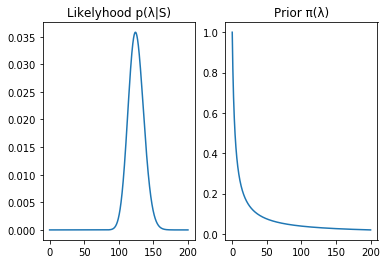

In [2]:
n = 60
S = 124
alpha = 0.25
cutoff = 2**9

prior = lambda x: 1./(1. + alpha * x)

def lhood(l, S=S):
    return scipy.stats.poisson.pmf(S, l)

vals = np.arange(0., 200., 0.1)
prior_vals = [prior(x) for x in vals]
lhood_vals= [lhood(x) for x in vals]

plt.subplot(1,2,1)
plt.plot(vals, lhood_vals)
plt.title("Likelyhood p(λ|S)")
plt.subplot(1,2,2)
plt.plot(vals, prior_vals)
plt.title("Prior π(λ)")


(0.031242316260646694, 1.0682554228150217e-08)
(0.9999999999999828, 2.848238466009327e-10)


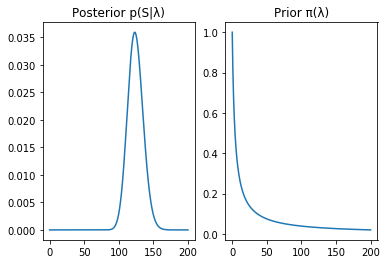

In [3]:
raw_posterior = lambda l: prior(l)*lhood(l)
posterior_norm = scipy.integrate.quad(raw_posterior, 0., cutoff)
print(posterior_norm)

posterior = lambda l: raw_posterior(l)/posterior_norm[0]

posterior_vals = [posterior(x) for x in vals]

plt.subplot(1,2,1)
plt.plot(vals, posterior_vals)
plt.title("Posterior p(S|λ)")
plt.subplot(1,2,2)
plt.plot(vals, prior_vals)
plt.title("Prior π(λ)")

print(scipy.integrate.quad(lambda x: posterior(x), 0., cutoff))

In [4]:
bayes_mean = scipy.integrate.quad(lambda x: x * posterior(x), 0., cutoff)
print("Bayes estimator: {}".format(bayes_mean[0]))

Bayes estimator: 124.03148033675856


In [5]:
conf = 0.95
prec = 0.01

#integration steps and borders
delta_l = 0.01
l_min = 0.
l_max = 200.

#find the maximum
l_ex = l_min
l_range = np.arange(l_min, l_max, delta_l)
for l in l_range:
    if posterior(l) >= posterior(l_ex):
        l_ex = l
print("Maximum posterior at: {}".format(l_ex))

#integrate over symmetric interval around maximum
#increase interval size
#until confidence is reached
best_l = False
l_1 = l_ex
l_2 = l_ex
while best_l == False:
    l_2 = l_2 + delta_l
    l_1 = l_1 - delta_l
    prob = scipy.integrate.quad(posterior, l_1, l_2)
    if prob[0] >= conf:
        best_l = True
        
print("Symmetric 95/% interval around maximum: [{},{}]".format(l_1, l_2))
print("NOT equal to HPD, but close, due to relatively small skewness")



Maximum posterior at: 123.03
Symmetric 95/% interval around maximum: [101.10999999998879,144.9499999999871]


In [7]:
#start with an infinitesimal interval around maximum, extend so that value of posterior distribution is maximized
#Works because density is monotone on both side s of the distribution!
#Otherwise an interval scan would be needed
l_1 = l_ex - delta_l
l_2 = l_ex + delta_l

#boolean for cutting iteration off
is_conf = False
while is_conf == False:
    # look at neighbours and determine which is larger -> select the larger for for interval extension
    if posterior(l_2 + delta_l) < posterior(l_1 - delta_l):
        l_1 = l_1 - delta_l
    elif posterior(l_2 + delta_l) > posterior(l_1 - delta_l):
        l_2 = l_2 + delta_l
    #or choose both if of equal size
    else:
        l_1 = l_1 - delta_l
        l_2 = l_2 + delta_l
    #integrate over interval
    area = scipy.integrate.quad(posterior, l_1, l_2)
    print("integrating over [{}, {}]: {}".format(l_1, l_2, area[0]))
    
    #area keeps growing, stop if confidence threshold is met
    if area[0] >= conf:
        is_conf = True

print("HPD 95/% interval: [{},{}]".format(l_1, l_2))

integrating over [123.02, 123.05000000000001]: 0.0010784067482504517
integrating over [123.00999999999999, 123.05000000000001]: 0.001437875382467958
integrating over [123.00999999999999, 123.06000000000002]: 0.001797343606311258
integrating over [122.99999999999999, 123.06000000000002]: 0.0021568116124245
integrating over [122.99999999999999, 123.07000000000002]: 0.00251627900321521
integrating over [122.98999999999998, 123.07000000000002]: 0.0028757460888519893
integrating over [122.98999999999998, 123.08000000000003]: 0.0032352123545046096
integrating over [122.97999999999998, 123.08000000000003]: 0.003594678227247452
integrating over [122.97999999999998, 123.09000000000003]: 0.003954143075726389
integrating over [122.96999999999997, 123.09000000000003]: 0.004313607443113129
integrating over [122.96999999999997, 123.10000000000004]: 0.0046730705824340295
integrating over [122.95999999999997, 123.10000000000004]: 0.005032533151958675
integrating over [122.95999999999997, 123.110000000

integrating over [122.02999999999949, 124.03000000000051]: 0.07179650621266949
integrating over [122.02999999999949, 124.04000000000052]: 0.07215451464944893
integrating over [122.01999999999948, 124.04000000000052]: 0.07251249836531526
integrating over [122.01999999999948, 124.05000000000052]: 0.07287047768811704
integrating over [122.00999999999948, 124.05000000000052]: 0.07322843172263638
integrating over [122.00999999999948, 124.06000000000053]: 0.07358638164755353
integrating over [121.99999999999947, 124.06000000000053]: 0.07394430570732308
integrating over [121.99999999999947, 124.07000000000053]: 0.0743022259505646
integrating over [121.98999999999947, 124.07000000000053]: 0.07466011974220638
integrating over [121.98999999999947, 124.08000000000054]: 0.07501801002009527
integrating over [121.97999999999946, 124.08000000000054]: 0.07537587325026202
integrating over [121.97999999999946, 124.09000000000054]: 0.07573373327924116
integrating over [121.96999999999946, 124.09000000000

integrating over [121.10999999999902, 124.980000000001]: 0.1384119420193573
integrating over [121.09999999999901, 124.980000000001]: 0.1387659721180189
integrating over [121.09999999999901, 124.990000000001]: 0.1391199652229944
integrating over [121.08999999999901, 124.990000000001]: 0.13947393884581186
integrating over [121.08999999999901, 125.00000000000101]: 0.13982787647318834
integrating over [121.079999999999, 125.00000000000101]: 0.14018179333214756
integrating over [121.079999999999, 125.01000000000101]: 0.1405356752118919
integrating over [121.069999999999, 125.01000000000101]: 0.14088953501908516
integrating over [121.069999999999, 125.02000000000102]: 0.1412433608813196
integrating over [121.059999999999, 125.02000000000102]: 0.14159716334893002
integrating over [121.059999999999, 125.03000000000102]: 0.14195093292397
integrating over [121.04999999999899, 125.03000000000102]: 0.14230467776426997
integrating over [121.04999999999899, 125.04000000000103]: 0.14265839078260145
i

integrating over [120.57999999999875, 125.52000000000127]: 0.17612059409559563
integrating over [120.56999999999874, 125.52000000000127]: 0.17647123647918767
integrating over [120.56999999999874, 125.53000000000128]: 0.17682185188324348
integrating over [120.55999999999874, 125.53000000000128]: 0.17717242267090347
integrating over [120.55999999999874, 125.54000000000129]: 0.17752296827950287
integrating over [120.54999999999873, 125.54000000000129]: 0.17787346718911198
integrating over [120.54999999999873, 125.55000000000129]: 0.17822394274246903
integrating over [120.53999999999873, 125.55000000000129]: 0.17857436949204603
integrating over [120.53999999999873, 125.5600000000013]: 0.17892477473056795
integrating over [120.52999999999872, 125.5600000000013]: 0.17927512903825232
integrating over [120.52999999999872, 125.5700000000013]: 0.1796254637025727
integrating over [120.51999999999872, 125.5700000000013]: 0.17997574528663277
integrating over [120.51999999999872, 125.5800000000013]:

integrating over [119.7099999999983, 126.42000000000174]: 0.237574935765033
integrating over [119.6999999999983, 126.42000000000174]: 0.23791830926886012
integrating over [119.6999999999983, 126.43000000000174]: 0.23826162801304812
integrating over [119.68999999999829, 126.43000000000174]: 0.2386049059381964
integrating over [119.68999999999829, 126.44000000000175]: 0.23894813238645876
integrating over [119.67999999999829, 126.44000000000175]: 0.23929131446476626
integrating over [119.67999999999829, 126.45000000000175]: 0.23963444837775608
integrating over [119.66999999999828, 126.45000000000175]: 0.2399775343412222
integrating over [119.66999999999828, 126.46000000000176]: 0.24032057547985072
integrating over [119.65999999999828, 126.46000000000176]: 0.24066356506068765
integrating over [119.65999999999828, 126.47000000000176]: 0.24100651318613336
integrating over [119.64999999999827, 126.47000000000176]: 0.2413494061167199
integrating over [119.64999999999827, 126.48000000000177]: 0

integrating over [118.86999999999787, 127.28000000000218]: 0.2952240769801981
integrating over [118.86999999999787, 127.29000000000218]: 0.295558609859233
integrating over [118.85999999999787, 127.29000000000218]: 0.2958930392785748
integrating over [118.85999999999787, 127.30000000000219]: 0.29622746023087704
integrating over [118.84999999999786, 127.30000000000219]: 0.2965617722700202
integrating over [118.84999999999786, 127.31000000000219]: 0.2968960810791658
integrating over [118.84999999999786, 127.3200000000022]: 0.2972302775289703
integrating over [118.83999999999786, 127.3200000000022]: 0.2975644719379877
integrating over [118.83999999999786, 127.3300000000022]: 0.29789855581258845
integrating over [118.82999999999785, 127.3300000000022]: 0.29823263234177855
integrating over [118.82999999999785, 127.3400000000022]: 0.2985666034256034
integrating over [118.81999999999785, 127.3400000000022]: 0.2989005618255202
integrating over [118.81999999999785, 127.35000000000221]: 0.2992344

integrating over [118.35999999999761, 127.82000000000245]: 0.33002450526679206
integrating over [118.35999999999761, 127.83000000000246]: 0.33035269149692215
integrating over [118.3499999999976, 127.83000000000246]: 0.3306808210846387
integrating over [118.3499999999976, 127.84000000000246]: 0.33100888411318774
integrating over [118.3399999999976, 127.84000000000246]: 0.33133688389725485
integrating over [118.3399999999976, 127.85000000000247]: 0.3316648235235199
integrating over [118.3299999999976, 127.85000000000247]: 0.33199269326719477
integrating over [118.3299999999976, 127.86000000000247]: 0.33232050929077506
integrating over [118.31999999999759, 127.86000000000247]: 0.3326482487575979
integrating over [118.31999999999759, 127.87000000000248]: 0.3329759409784056
integrating over [118.30999999999759, 127.87000000000248]: 0.3333035499321506
integrating over [118.30999999999759, 127.88000000000248]: 0.3336311181503735
integrating over [118.29999999999758, 127.88000000000248]: 0.333

integrating over [117.7499999999973, 128.4700000000021]: 0.37086177947980997
integrating over [117.7399999999973, 128.4700000000021]: 0.3711815679369857
integrating over [117.7399999999973, 128.4800000000021]: 0.3715013418928098
integrating over [117.72999999999729, 128.4800000000021]: 0.37182098662533875
integrating over [117.72999999999729, 128.49000000000208]: 0.37214062496966765
integrating over [117.72999999999729, 128.50000000000207]: 0.37246012752183555
integrating over [117.71999999999728, 128.50000000000207]: 0.3727796283106402
integrating over [117.71999999999728, 128.51000000000207]: 0.37309899489030746
integrating over [117.70999999999728, 128.51000000000207]: 0.37341835151663644
integrating over [117.70999999999728, 128.52000000000206]: 0.373737581943776
integrating over [117.69999999999727, 128.52000000000206]: 0.37405679418918725
integrating over [117.69999999999727, 128.53000000000205]: 0.37437588828409024
integrating over [117.68999999999727, 128.53000000000205]: 0.374

integrating over [116.84999999999684, 129.42000000000124]: 0.4287912237264861
integrating over [116.84999999999684, 129.43000000000123]: 0.4290973523329676
integrating over [116.83999999999683, 129.43000000000123]: 0.4294033653974658
integrating over [116.83999999999683, 129.44000000000122]: 0.429709342667671
integrating over [116.82999999999683, 129.44000000000122]: 0.43001519357300183
integrating over [116.82999999999683, 129.4500000000012]: 0.4303210193571171
integrating over [116.81999999999682, 129.4500000000012]: 0.43062670791359814
integrating over [116.81999999999682, 129.4600000000012]: 0.4309323820621411
integrating over [116.81999999999682, 129.4700000000012]: 0.4312379044259393
integrating over [116.80999999999682, 129.4700000000012]: 0.4315434304442771
integrating over [116.80999999999682, 129.48000000000118]: 0.4318488008744922
integrating over [116.79999999999681, 129.48000000000118]: 0.432154164165707
integrating over [116.79999999999681, 129.49000000000117]: 0.43245938

integrating over [116.03999999999643, 130.30000000000044]: 0.4793816269028888
integrating over [116.02999999999642, 130.30000000000044]: 0.47967392071739734
integrating over [116.02999999999642, 130.31000000000043]: 0.47996619476875735
integrating over [116.01999999999641, 130.31000000000043]: 0.48025831221415544
integrating over [116.01999999999641, 130.32000000000042]: 0.48055042302214995
integrating over [116.01999999999641, 130.3300000000004]: 0.48084237046638384
integrating over [116.00999999999641, 130.3300000000004]: 0.4811343113822178
integrating over [116.00999999999641, 130.3400000000004]: 0.48142609534264547
integrating over [115.9999999999964, 130.3400000000004]: 0.48171785956878926
integrating over [115.9999999999964, 130.3500000000004]: 0.4820094799257199
integrating over [115.9899999999964, 130.3500000000004]: 0.48230106730246014
integrating over [115.9899999999964, 130.36000000000038]: 0.48259252393649976
integrating over [115.9799999999964, 130.36000000000038]: 0.48288

integrating over [115.32999999999606, 131.06999999999974]: 0.5217065067918362
integrating over [115.31999999999606, 131.06999999999974]: 0.5219859012526825
integrating over [115.31999999999606, 131.07999999999973]: 0.5222652779353119
integrating over [115.31999999999606, 131.08999999999972]: 0.5225444830891133
integrating over [115.30999999999605, 131.08999999999972]: 0.5228236907310914
integrating over [115.30999999999605, 131.0999999999997]: 0.5231027242615381
integrating over [115.29999999999605, 131.0999999999997]: 0.5233817449513547
integrating over [115.29999999999605, 131.1099999999997]: 0.523660606764264
integrating over [115.28999999999604, 131.1099999999997]: 0.5239394403690129
integrating over [115.28999999999604, 131.1199999999997]: 0.5242181303705382
integrating over [115.27999999999604, 131.1199999999997]: 0.5244967767576891
integrating over [115.27999999999604, 131.12999999999968]: 0.5247752948542951
integrating over [115.26999999999603, 131.12999999999968]: 0.5250537538

integrating over [114.59999999999569, 131.85999999999902]: 0.5631387824503703
integrating over [114.59999999999569, 131.869999999999]: 0.5634043434641184
integrating over [114.58999999999568, 131.869999999999]: 0.5636697742730775
integrating over [114.58999999999568, 131.879999999999]: 0.5639351573144938
integrating over [114.57999999999568, 131.879999999999]: 0.5642003926089787
integrating over [114.57999999999568, 131.889999999999]: 0.5644655976096676
integrating over [114.56999999999567, 131.889999999999]: 0.5647306372852843
integrating over [114.56999999999567, 131.89999999999898]: 0.5649956641771939
integrating over [114.56999999999567, 131.90999999999897]: 0.5652605128925694
integrating over [114.55999999999567, 131.90999999999897]: 0.5655253568453084
integrating over [114.55999999999567, 131.91999999999896]: 0.5657900273167842
integrating over [114.54999999999566, 131.91999999999896]: 0.5660546754430138
integrating over [114.54999999999566, 131.92999999999896]: 0.566319167603497

integrating over [113.86999999999531, 132.66999999999828]: 0.6029238782143429
integrating over [113.86999999999531, 132.67999999999827]: 0.6031748294805822
integrating over [113.85999999999531, 132.67999999999827]: 0.6034257383040151
integrating over [113.85999999999531, 132.68999999999826]: 0.6036765071024242
integrating over [113.8499999999953, 132.68999999999826]: 0.6039272138447886
integrating over [113.8499999999953, 132.69999999999825]: 0.6041778001328585
integrating over [113.8399999999953, 132.69999999999825]: 0.6044283047191158
integrating over [113.8399999999953, 132.70999999999825]: 0.6046787084546982
integrating over [113.8299999999953, 132.70999999999825]: 0.6049290108101705
integrating over [113.8299999999953, 132.71999999999824]: 0.6051792319513992
integrating over [113.81999999999529, 132.71999999999824]: 0.605429332001823
integrating over [113.81999999999529, 132.72999999999823]: 0.6056793705071566
integrating over [113.80999999999528, 132.72999999999823]: 0.6059292681

integrating over [113.03999999999489, 133.59999999999744]: 0.6456087284709658
integrating over [113.02999999999489, 133.59999999999744]: 0.6458426460117797
integrating over [113.02999999999489, 133.60999999999743]: 0.6460764859360518
integrating over [113.01999999999488, 133.60999999999743]: 0.6463101965302446
integrating over [113.01999999999488, 133.61999999999742]: 0.646543851343752
integrating over [113.00999999999487, 133.61999999999742]: 0.6467773549494743
integrating over [113.00999999999487, 133.6299999999974]: 0.6470108246378488
integrating over [112.99999999999487, 133.6299999999974]: 0.6472441212136245
integrating over [112.99999999999487, 133.6399999999974]: 0.6474774057627531
integrating over [112.99999999999487, 133.6499999999974]: 0.6477105051588179
integrating over [112.98999999999486, 133.6499999999974]: 0.647943594663595
integrating over [112.98999999999486, 133.65999999999738]: 0.6481765088930939
integrating over [112.97999999999486, 133.65999999999738]: 0.6484093912

integrating over [112.2799999999945, 134.44999999999666]: 0.6820089320753796
integrating over [112.2699999999945, 134.44999999999666]: 0.6822270299936692
integrating over [112.2699999999945, 134.45999999999665]: 0.6824451122779394
integrating over [112.2699999999945, 134.46999999999665]: 0.6826630092384934
integrating over [112.25999999999449, 134.46999999999665]: 0.6828808981456056
integrating over [112.25999999999449, 134.47999999999664]: 0.6830986097916832
integrating over [112.24999999999449, 134.47999999999664]: 0.6833162896753665
integrating over [112.24999999999449, 134.48999999999663]: 0.683533816016591
integrating over [112.23999999999448, 134.48999999999663]: 0.6837512868649583
integrating over [112.23999999999448, 134.49999999999662]: 0.6839686279111813
integrating over [112.22999999999448, 134.49999999999662]: 0.6841858897127506
integrating over [112.22999999999448, 134.5099999999966]: 0.6844030454740555
integrating over [112.21999999999447, 134.5099999999966]: 0.6846200982

integrating over [111.41999999999406, 135.41999999999578]: 0.7202943550893085
integrating over [111.41999999999406, 135.42999999999577]: 0.7204945424936239
integrating over [111.40999999999406, 135.42999999999577]: 0.7206946592149538
integrating over [111.40999999999406, 135.43999999999576]: 0.720894663391765
integrating over [111.39999999999405, 135.43999999999576]: 0.7210945714177153
integrating over [111.39999999999405, 135.44999999999575]: 0.7212943924006646
integrating over [111.38999999999405, 135.44999999999575]: 0.7214940917508363
integrating over [111.38999999999405, 135.45999999999574]: 0.721693729573842
integrating over [111.37999999999404, 135.45999999999574]: 0.7218932202682485
integrating over [111.37999999999404, 135.46999999999574]: 0.7220926749653857
integrating over [111.37999999999404, 135.47999999999573]: 0.7222919465710674
integrating over [111.36999999999404, 135.47999999999573]: 0.7224912286300059
integrating over [111.36999999999404, 135.48999999999572]: 0.72269

integrating over [110.5099999999936, 136.45999999999484]: 0.7574989907199385
integrating over [110.5099999999936, 136.46999999999483]: 0.7576803438242593
integrating over [110.49999999999359, 136.46999999999483]: 0.7578615921227894
integrating over [110.49999999999359, 136.47999999999482]: 0.7580427666924849
integrating over [110.48999999999359, 136.47999999999482]: 0.7582238095025424
integrating over [110.48999999999359, 136.4899999999948]: 0.7584048055937962
integrating over [110.47999999999358, 136.4899999999948]: 0.7585856429661149
integrating over [110.47999999999358, 136.4999999999948]: 0.7587664606353274
integrating over [110.47999999999358, 136.5099999999948]: 0.7589470999390291
integrating over [110.46999999999358, 136.5099999999948]: 0.7591277319246069
integrating over [110.46999999999358, 136.51999999999478]: 0.7593081929195883
integrating over [110.45999999999357, 136.51999999999478]: 0.759488619569767
integrating over [110.45999999999357, 136.52999999999477]: 0.75966890231

integrating over [109.9399999999933, 137.12999999999423]: 0.7792625505493321
integrating over [109.9299999999933, 137.12999999999423]: 0.7794321761964944
integrating over [109.9299999999933, 137.13999999999422]: 0.7796017008917693
integrating over [109.9199999999933, 137.13999999999422]: 0.7797711244432349
integrating over [109.9199999999933, 137.1499999999942]: 0.7799404747879113
integrating over [109.90999999999329, 137.1499999999942]: 0.7801096963120788
integrating over [109.90999999999329, 137.1599999999942]: 0.7802788723748002
integrating over [109.89999999999328, 137.1599999999942]: 0.7804478919404564
integrating over [109.89999999999328, 137.1699999999942]: 0.7806168937899857
integrating over [109.89999999999328, 137.17999999999418]: 0.7807857214953532
integrating over [109.88999999999328, 137.17999999999418]: 0.7809545391714876
integrating over [109.88999999999328, 137.18999999999417]: 0.7811231928017912
integrating over [109.87999999999327, 137.18999999999417]: 0.7812918086577

integrating over [109.19999999999293, 137.98999999999344]: 0.8052230111689307
integrating over [109.18999999999292, 137.98999999999344]: 0.8053778853646453
integrating over [109.18999999999292, 137.99999999999343]: 0.8055326837226772
integrating over [109.17999999999292, 137.99999999999343]: 0.8056873616617128
integrating over [109.17999999999292, 138.00999999999343]: 0.8058419921677111
integrating over [109.16999999999291, 138.00999999999343]: 0.8059964739392965
integrating over [109.16999999999291, 138.01999999999342]: 0.8061509366754972
integrating over [109.16999999999291, 138.0299999999934]: 0.8063052317242124
integrating over [109.1599999999929, 138.0299999999934]: 0.806459517417813
integrating over [109.1599999999929, 138.0399999999934]: 0.8066136448615301
integrating over [109.1499999999929, 138.0399999999934]: 0.8067677345669089
integrating over [109.1499999999929, 138.0499999999934]: 0.8069216944882583
integrating over [109.1399999999929, 138.0499999999934]: 0.807075588295427

integrating over [108.42999999999253, 138.89999999999262]: 0.8299905942965816
integrating over [108.41999999999253, 138.89999999999262]: 0.8301306362826546
integrating over [108.41999999999253, 138.9099999999926]: 0.8302705130133861
integrating over [108.40999999999252, 138.9099999999926]: 0.8304103663427599
integrating over [108.40999999999252, 138.9199999999926]: 0.8305500832395131
integrating over [108.39999999999252, 138.9199999999926]: 0.8306897480200854
integrating over [108.39999999999252, 138.9299999999926]: 0.8308293051764909
integrating over [108.38999999999251, 138.9299999999926]: 0.8309687815164313
integrating over [108.38999999999251, 138.93999999999258]: 0.83110817902621
integrating over [108.3799999999925, 138.93999999999258]: 0.8312474670338802
integrating over [108.3799999999925, 138.94999999999257]: 0.8313867049909326
integrating over [108.3699999999925, 138.94999999999257]: 0.8315258047748412
integrating over [108.3699999999925, 138.95999999999256]: 0.831664883273166

integrating over [107.62999999999212, 139.82999999999177]: 0.8529442215982097
integrating over [107.62999999999212, 139.83999999999176]: 0.853069647559788
integrating over [107.61999999999212, 139.83999999999176]: 0.8531949554005179
integrating over [107.61999999999212, 139.84999999999175]: 0.8533202306599941
integrating over [107.61999999999212, 139.85999999999174]: 0.8534453553196969
integrating over [107.60999999999211, 139.85999999999174]: 0.8535704837939959
integrating over [107.60999999999211, 139.86999999999173]: 0.8536954579563599
integrating over [107.59999999999211, 139.86999999999173]: 0.8538204071881258
integrating over [107.59999999999211, 139.87999999999172]: 0.8539452309556562
integrating over [107.5899999999921, 139.87999999999172]: 0.8540700010690465
integrating over [107.5899999999921, 139.88999999999172]: 0.8541946745443122
integrating over [107.5799999999921, 139.88999999999172]: 0.8543192656636305
integrating over [107.5799999999921, 139.8999999999917]: 0.854443788

integrating over [106.70999999999165, 140.93999999999076]: 0.8767631230972092
integrating over [106.70999999999165, 140.94999999999075]: 0.876872461196652
integrating over [106.69999999999165, 140.94999999999075]: 0.8769818070994818
integrating over [106.69999999999165, 140.95999999999074]: 0.8770910062591694
integrating over [106.68999999999164, 140.95999999999074]: 0.8772001848777814
integrating over [106.68999999999164, 140.96999999999073]: 0.877309245206681
integrating over [106.67999999999164, 140.96999999999073]: 0.877418256679179
integrating over [106.67999999999164, 140.97999999999072]: 0.8775271782863405
integrating over [106.66999999999163, 140.97999999999072]: 0.8776360227509149
integrating over [106.66999999999163, 140.98999999999072]: 0.8777448057454673
integrating over [106.65999999999163, 140.98999999999072]: 0.8778534833404099
integrating over [106.65999999999163, 140.9999999999907]: 0.8779621278314712
integrating over [106.65999999999163, 141.0099999999907]: 0.87807063

integrating over [105.89999999999124, 141.90999999998988]: 0.8950652130041408
integrating over [105.89999999999124, 141.91999999998987]: 0.8951615868067528
integrating over [105.89999999999124, 141.92999999998986]: 0.8952578324005697
integrating over [105.88999999999123, 141.92999999998986]: 0.8953540856138565
integrating over [105.88999999999123, 141.93999999998985]: 0.8954502031107427
integrating over [105.87999999999123, 141.93999999998985]: 0.8955463005906856
integrating over [105.87999999999123, 141.94999999998984]: 0.8956422901024519
integrating over [105.86999999999122, 141.94999999998984]: 0.8957382319957022
integrating over [105.86999999999122, 141.95999999998983]: 0.8958340936342576
integrating over [105.85999999999122, 141.95999999998983]: 0.8959298800875457
integrating over [105.85999999999122, 141.96999999998982]: 0.89602561396478
integrating over [105.84999999999121, 141.96999999998982]: 0.8961212451249194
integrating over [105.84999999999121, 141.97999999998981]: 0.89621

integrating over [105.0499999999908, 142.95999999998892]: 0.9121456518765398
integrating over [105.0399999999908, 142.95999999998892]: 0.9122291985450701
integrating over [105.0399999999908, 142.96999999998891]: 0.9123127228304826
integrating over [105.0399999999908, 142.9799999999889]: 0.9123961306897082
integrating over [105.02999999999079, 142.9799999999889]: 0.9124795343388582
integrating over [105.02999999999079, 142.9899999999889]: 0.9125628258840399
integrating over [105.01999999999079, 142.9899999999889]: 0.9126460866657392
integrating over [105.01999999999079, 142.9999999999889]: 0.9127292620089857
integrating over [105.00999999999078, 142.9999999999889]: 0.9128123800752489
integrating over [105.00999999999078, 143.00999999998888]: 0.9128954393287059
integrating over [104.99999999999078, 143.00999999998888]: 0.9129784148315746
integrating over [104.99999999999078, 143.01999999998887]: 0.9130613581073836
integrating over [104.99999999999078, 143.02999999998886]: 0.9131441855176

integrating over [104.14999999999034, 144.05999999998792]: 0.9276238121409617
integrating over [104.14999999999034, 144.0699999999879]: 0.9276951986206817
integrating over [104.14999999999034, 144.0799999999879]: 0.927766480908798
integrating over [104.13999999999034, 144.0799999999879]: 0.9278377679046597
integrating over [104.13999999999034, 144.0899999999879]: 0.9279089461110747
integrating over [104.12999999999033, 144.0899999999879]: 0.9279801038685735
integrating over [104.12999999999033, 144.0999999999879]: 0.9280511781031372
integrating over [104.11999999999033, 144.0999999999879]: 0.928122206776003
integrating over [104.11999999999033, 144.10999999998788]: 0.9281931771485181
integrating over [104.10999999999032, 144.10999999998788]: 0.9282640768904207
integrating over [104.10999999999032, 144.11999999998787]: 0.9283349435106608
integrating over [104.10999999999032, 144.12999999998786]: 0.9284057064884574
integrating over [104.09999999999032, 144.12999999998786]: 0.928476477453

integrating over [103.65999999999009, 144.68999999998735]: 0.9352659265897554
integrating over [103.64999999999009, 144.68999999998735]: 0.9353310615238983
integrating over [103.64999999999009, 144.69999999998734]: 0.9353960971792761
integrating over [103.63999999999008, 144.69999999998734]: 0.9354611103959838
integrating over [103.63999999999008, 144.70999999998733]: 0.9355260487142061
integrating over [103.62999999999008, 144.70999999998733]: 0.9355909403666243
integrating over [103.62999999999008, 144.71999999998732]: 0.9356557814552479
integrating over [103.61999999999007, 144.71999999998732]: 0.9357205516964167
integrating over [103.61999999999007, 144.7299999999873]: 0.9357852956629438
integrating over [103.61999999999007, 144.7399999999873]: 0.9358499426148652
integrating over [103.60999999999007, 144.7399999999873]: 0.9359145915979459
integrating over [103.60999999999007, 144.7499999999873]: 0.9359791416427452
integrating over [103.59999999999006, 144.7499999999873]: 0.93604366

integrating over [103.13999999998983, 145.32999999998677]: 0.9424654271809007
integrating over [103.13999999998983, 145.33999999998676]: 0.9425244483048737
integrating over [103.12999999998982, 145.33999999998676]: 0.94258345635253
integrating over [103.12999999998982, 145.34999999998675]: 0.9426423869342924
integrating over [103.11999999998982, 145.34999999998675]: 0.9427012811876981
integrating over [103.11999999998982, 145.35999999998674]: 0.9427601213318441
integrating over [103.10999999998981, 145.35999999998674]: 0.9428189019424638
integrating over [103.10999999998981, 145.36999999998673]: 0.9428776517535964
integrating over [103.10999999998981, 145.37999999998672]: 0.9429363113362719
integrating over [103.0999999999898, 145.37999999998672]: 0.9429949784553798
integrating over [103.0999999999898, 145.3899999999867]: 0.9430535479140196
integrating over [103.0899999999898, 145.3899999999867]: 0.9431121016930525
integrating over [103.0899999999898, 145.3999999999867]: 0.943170581132

integrating over [102.66999999998959, 145.91999999998623]: 0.9484489471414819
integrating over [102.66999999998959, 145.92999999998622]: 0.9485028035852289
integrating over [102.65999999998958, 145.92999999998622]: 0.9485566262349817
integrating over [102.65999999998958, 145.9399999999862]: 0.9486103982188118
integrating over [102.64999999998957, 145.9399999999862]: 0.9486641141392084
integrating over [102.64999999998957, 145.9499999999862]: 0.9487178017645191
integrating over [102.64999999998957, 145.9599999999862]: 0.948771405132733
integrating over [102.63999999998957, 145.9599999999862]: 0.948825014472782
integrating over [102.63999999998957, 145.9699999999862]: 0.9488785336851848
integrating over [102.62999999998956, 145.9699999999862]: 0.9489320365939868
integrating over [102.62999999998956, 145.97999999998618]: 0.9489854717517964
integrating over [102.61999999998956, 145.97999999998618]: 0.949038868378161
integrating over [102.61999999998956, 145.98999999998617]: 0.9490922195826

integrating over [0.0, 123.03]: 0.47599074128123425
integrating over [0.0, 123.04]: 0.4763502102947413
integrating over [0.0, 123.05000000000001]: 0.4767096790595029
integrating over [0.0, 123.06000000000002]: 0.4770691472833452
integrating over [0.0, 123.07000000000002]: 0.4774286146741383
integrating over [0.0, 123.08000000000003]: 0.4777880809397805
integrating over [0.0, 123.09000000000003]: 0.4781475457882775
integrating over [0.0, 123.10000000000004]: 0.47850700892757664
integrating over [0.0, 123.11000000000004]: 0.4788664700658169
integrating over [0.0, 123.12000000000005]: 0.4792259289110748
integrating over [0.0, 123.13000000000005]: 0.47958538517153465
integrating over [0.0, 123.14000000000006]: 0.4799448385554337
integrating over [0.0, 123.15000000000006]: 0.4803042887710054
integrating over [0.0, 123.16000000000007]: 0.4806637355266484
integrating over [0.0, 123.17000000000007]: 0.48102317853071364
integrating over [0.0, 123.18000000000008]: 0.48138261749168537
integrating

integrating over [0.0, 124.48000000000074]: 0.5279669551860184
integrating over [0.0, 124.49000000000075]: 0.5283233741727454
integrating over [0.0, 124.50000000000075]: 0.5286797513939835
integrating over [0.0, 124.51000000000076]: 0.5290360865717699
integrating over [0.0, 124.52000000000076]: 0.5293923794281609
integrating over [0.0, 124.53000000000077]: 0.5297486296854437
integrating over [0.0, 124.54000000000077]: 0.5301048370659844
integrating over [0.0, 124.55000000000078]: 0.5304610012923759
integrating over [0.0, 124.56000000000078]: 0.5308171220872733
integrating over [0.0, 124.57000000000079]: 0.5311731991735836
integrating over [0.0, 124.5800000000008]: 0.5315292322742453
integrating over [0.0, 124.5900000000008]: 0.5318852211124055
integrating over [0.0, 124.6000000000008]: 0.5322411654113884
integrating over [0.0, 124.61000000000081]: 0.5325970648946076
integrating over [0.0, 124.62000000000081]: 0.5329529192856751
integrating over [0.0, 124.63000000000082]: 0.533308728308

integrating over [0.0, 125.80000000000142]: 0.5745509271114408
integrating over [0.0, 125.81000000000142]: 0.5748994907245041
integrating over [0.0, 125.82000000000143]: 0.5752479773472154
integrating over [0.0, 125.83000000000143]: 0.5755963867256807
integrating over [0.0, 125.84000000000144]: 0.5759447186062711
integrating over [0.0, 125.85000000000144]: 0.5762929727355833
integrating over [0.0, 125.86000000000145]: 0.5766411488604402
integrating over [0.0, 125.87000000000145]: 0.5769892467278406
integrating over [0.0, 125.88000000000146]: 0.5773372660850221
integrating over [0.0, 125.89000000000146]: 0.5776852066795022
integrating over [0.0, 125.90000000000147]: 0.5780330682589199
integrating over [0.0, 125.91000000000147]: 0.5783808505712192
integrating over [0.0, 125.92000000000148]: 0.5787285533645324
integrating over [0.0, 125.93000000000148]: 0.5790761763872311
integrating over [0.0, 125.94000000000149]: 0.5794237193878932
integrating over [0.0, 125.9500000000015]: 0.5797711821

integrating over [0.0, 127.19000000000213]: 0.6221551302430612
integrating over [0.0, 127.20000000000213]: 0.6224906606764082
integrating over [0.0, 127.21000000000214]: 0.6228260811436322
integrating over [0.0, 127.22000000000214]: 0.6231613914257866
integrating over [0.0, 127.23000000000215]: 0.6234965913041746
integrating over [0.0, 127.24000000000215]: 0.6238316805603754
integrating over [0.0, 127.25000000000216]: 0.6241666589763143
integrating over [0.0, 127.26000000000217]: 0.6245015263340625
integrating over [0.0, 127.27000000000217]: 0.6248362824161069
integrating over [0.0, 127.28000000000218]: 0.6251709270051633
integrating over [0.0, 127.29000000000218]: 0.6255054598841924
integrating over [0.0, 127.30000000000219]: 0.625839880836509
integrating over [0.0, 127.31000000000219]: 0.6261741896456389
integrating over [0.0, 127.3200000000022]: 0.6265083860954594
integrating over [0.0, 127.3300000000022]: 0.6268424699700615
integrating over [0.0, 127.3400000000022]: 0.6271764410538

integrating over [0.0, 128.55000000000203]: 0.6666919260753719
integrating over [0.0, 128.56000000000202]: 0.6670106100985075
integrating over [0.0, 128.570000000002]: 0.6673291570737241
integrating over [0.0, 128.580000000002]: 0.6676475668229221
integrating over [0.0, 128.590000000002]: 0.6679658391682941
integrating over [0.0, 128.60000000000198]: 0.6682839739323988
integrating over [0.0, 128.61000000000197]: 0.66860197093799
integrating over [0.0, 128.62000000000197]: 0.6689198300082504
integrating over [0.0, 128.63000000000196]: 0.6692375509666799
integrating over [0.0, 128.64000000000195]: 0.6695551336369899
integrating over [0.0, 128.65000000000194]: 0.6698725778433677
integrating over [0.0, 128.66000000000193]: 0.6701898834102051
integrating over [0.0, 128.67000000000192]: 0.6705070501622612
integrating over [0.0, 128.6800000000019]: 0.6708240779245892
integrating over [0.0, 128.6900000000019]: 0.6711409665225658
integrating over [0.0, 128.7000000000019]: 0.6714577157819185
int

integrating over [0.0, 129.9100000000008]: 0.708706214664891
integrating over [0.0, 129.92000000000078]: 0.7090047577258213
integrating over [0.0, 129.93000000000077]: 0.7093031425004743
integrating over [0.0, 129.94000000000077]: 0.7096013688553379
integrating over [0.0, 129.95000000000076]: 0.7098994366572977
integrating over [0.0, 129.96000000000075]: 0.7101973457735001
integrating over [0.0, 129.97000000000074]: 0.7104950960715127
integrating over [0.0, 129.98000000000073]: 0.7107926874191656
integrating over [0.0, 129.99000000000072]: 0.7110901196846661
integrating over [0.0, 130.0000000000007]: 0.7113873927365483
integrating over [0.0, 130.0100000000007]: 0.7116845064436387
integrating over [0.0, 130.0200000000007]: 0.7119814606751728
integrating over [0.0, 130.03000000000068]: 0.7122782553006686
integrating over [0.0, 130.04000000000067]: 0.7125748901899892
integrating over [0.0, 130.05000000000067]: 0.7128713652133621
integrating over [0.0, 130.06000000000066]: 0.71316768024131

integrating over [0.0, 131.2199999999996]: 0.746422610004172
integrating over [0.0, 131.2299999999996]: 0.7466994039819949
integrating over [0.0, 131.23999999999958]: 0.7469760250483128
integrating over [0.0, 131.24999999999957]: 0.7472524731135907
integrating over [0.0, 131.25999999999956]: 0.7475287480886759
integrating over [0.0, 131.26999999999956]: 0.7478048498846657
integrating over [0.0, 131.27999999999955]: 0.74808077841313
integrating over [0.0, 131.28999999999954]: 0.7483565335858419
integrating over [0.0, 131.29999999999953]: 0.7486321153149934
integrating over [0.0, 131.30999999999952]: 0.7489075235130436
integrating over [0.0, 131.3199999999995]: 0.7491827580928055
integrating over [0.0, 131.3299999999995]: 0.7494578189674989
integrating over [0.0, 131.3399999999995]: 0.7497327060505223
integrating over [0.0, 131.34999999999948]: 0.7500074192557293
integrating over [0.0, 131.35999999999947]: 0.7502819584972774
integrating over [0.0, 131.36999999999946]: 0.7505563236896787


integrating over [0.0, 132.66999999999828]: 0.7847138326781053
integrating over [0.0, 132.67999999999827]: 0.7849647839443272
integrating over [0.0, 132.68999999999826]: 0.785215552742726
integrating over [0.0, 132.69999999999825]: 0.785466139030803
integrating over [0.0, 132.70999999999825]: 0.7857165427663791
integrating over [0.0, 132.71999999999824]: 0.7859667639076081
integrating over [0.0, 132.72999999999823]: 0.7862168024129329
integrating over [0.0, 132.73999999999822]: 0.7864666582411514
integrating over [0.0, 132.7499999999982]: 0.7867163313513013
integrating over [0.0, 132.7599999999982]: 0.7869658217028157
integrating over [0.0, 132.7699999999982]: 0.7872151292553602
integrating over [0.0, 132.77999999999818]: 0.7874642539689357
integrating over [0.0, 132.78999999999817]: 0.7877131958039063
integrating over [0.0, 132.79999999999816]: 0.7879619547208583
integrating over [0.0, 132.80999999999815]: 0.7882105306807798
integrating over [0.0, 132.81999999999815]: 0.78845892364492

integrating over [0.0, 133.9799999999971]: 0.8160227754192618
integrating over [0.0, 133.98999999999708]: 0.8162495734499744
integrating over [0.0, 133.99999999999707]: 0.8164761860250852
integrating over [0.0, 134.00999999999706]: 0.81670261314109
integrating over [0.0, 134.01999999999705]: 0.816928854794719
integrating over [0.0, 134.02999999999705]: 0.8171549109829838
integrating over [0.0, 134.03999999999704]: 0.8173807817031896
integrating over [0.0, 134.04999999999703]: 0.8176064669529349
integrating over [0.0, 134.05999999999702]: 0.8178319667300263
integrating over [0.0, 134.069999999997]: 0.8180572810326651
integrating over [0.0, 134.079999999997]: 0.8182824098592452
integrating over [0.0, 134.089999999997]: 0.818507353208466
integrating over [0.0, 134.09999999999698]: 0.8187321110792775
integrating over [0.0, 134.10999999999697]: 0.818956683470943
integrating over [0.0, 134.11999999999696]: 0.8191810703830016
integrating over [0.0, 134.12999999999695]: 0.8194052718152542
inte

integrating over [0.0, 135.37999999999582]: 0.8459726045042025
integrating over [0.0, 135.3899999999958]: 0.8461735251502736
integrating over [0.0, 135.3999999999958]: 0.8463742624366091
integrating over [0.0, 135.4099999999958]: 0.8465748163959023
integrating over [0.0, 135.41999999999578]: 0.8467751870611042
integrating over [0.0, 135.42999999999577]: 0.8469753744654109
integrating over [0.0, 135.43999999999576]: 0.847175378642249
integrating over [0.0, 135.44999999999575]: 0.8473751996251833
integrating over [0.0, 135.45999999999574]: 0.8475748374481994
integrating over [0.0, 135.46999999999574]: 0.8477742921453452
integrating over [0.0, 135.47999999999573]: 0.8479735637510236
integrating over [0.0, 135.48999999999572]: 0.8481726522998084
integrating over [0.0, 135.4999999999957]: 0.8483715578264532
integrating over [0.0, 135.5099999999957]: 0.8485702803661008
integrating over [0.0, 135.5199999999957]: 0.8487688199539976
integrating over [0.0, 135.52999999999568]: 0.8489671766256754

integrating over [0.0, 136.67999999999464]: 0.8705691001415996
integrating over [0.0, 136.68999999999463]: 0.8707465387635496
integrating over [0.0, 136.69999999999462]: 0.8709238001319355
integrating over [0.0, 136.7099999999946]: 0.8711008843071937
integrating over [0.0, 136.7199999999946]: 0.8712777913500322
integrating over [0.0, 136.7299999999946]: 0.8714545213212008
integrating over [0.0, 136.73999999999458]: 0.8716310742817447
integrating over [0.0, 136.74999999999457]: 0.8718074502928799
integrating over [0.0, 136.75999999999456]: 0.8719836494160016
integrating over [0.0, 136.76999999999455]: 0.8721596717126526
integrating over [0.0, 136.77999999999454]: 0.8723355172446623
integrating over [0.0, 136.78999999999454]: 0.8725111860739232
integrating over [0.0, 136.79999999999453]: 0.8726866782626183
integrating over [0.0, 136.80999999999452]: 0.8728619938730783
integrating over [0.0, 136.8199999999945]: 0.873037132967804
integrating over [0.0, 136.8299999999945]: 0.873212095609510

integrating over [0.0, 137.97999999999345]: 0.8921735279244841
integrating over [0.0, 137.98999999999344]: 0.8923284942165705
integrating over [0.0, 137.99999999999343]: 0.8924832925746081
integrating over [0.0, 138.00999999999343]: 0.8926379230806306
integrating over [0.0, 138.01999999999342]: 0.8927923858168174
integrating over [0.0, 138.0299999999934]: 0.8929466808655154
integrating over [0.0, 138.0399999999934]: 0.8931008083092422
integrating over [0.0, 138.0499999999934]: 0.8932547682306273
integrating over [0.0, 138.05999999999338]: 0.8934085607123864
integrating over [0.0, 138.06999999999337]: 0.8935621858375086
integrating over [0.0, 138.07999999999336]: 0.8937156436890007
integrating over [0.0, 138.08999999999335]: 0.8938689343500741
integrating over [0.0, 138.09999999999334]: 0.8940220579040309
integrating over [0.0, 138.10999999999333]: 0.8941750144343839
integrating over [0.0, 138.11999999999333]: 0.8943278040246962
integrating over [0.0, 138.12999999999332]: 0.894480426758

integrating over [0.0, 139.3499999999922]: 0.9118757019046089
integrating over [0.0, 139.3599999999922]: 0.9120084803145725
integrating over [0.0, 139.3699999999922]: 0.9121411032079553
integrating over [0.0, 139.37999999999218]: 0.9122735706829044
integrating over [0.0, 139.38999999999217]: 0.912405882837764
integrating over [0.0, 139.39999999999216]: 0.9125380397709448
integrating over [0.0, 139.40999999999215]: 0.9126700415809544
integrating over [0.0, 139.41999999999214]: 0.9128018883663792
integrating over [0.0, 139.42999999999213]: 0.9129335802259305
integrating over [0.0, 139.43999999999212]: 0.9130651172583317
integrating over [0.0, 139.44999999999212]: 0.9131964995624987
integrating over [0.0, 139.4599999999921]: 0.9133277272374037
integrating over [0.0, 139.4699999999921]: 0.9134588003820572
integrating over [0.0, 139.4799999999921]: 0.913589719095647
integrating over [0.0, 139.48999999999208]: 0.9137204834773214
integrating over [0.0, 139.49999999999207]: 0.9138510936265258


integrating over [0.0, 140.69999999999098]: 0.928434649797006
integrating over [0.0, 140.70999999999097]: 0.9285473550372302
integrating over [0.0, 140.71999999999096]: 0.928659918735095
integrating over [0.0, 140.72999999999095]: 0.9287723409984777
integrating over [0.0, 140.73999999999094]: 0.9288846219353241
integrating over [0.0, 140.74999999999093]: 0.9289967616536469
integrating over [0.0, 140.75999999999092]: 0.9291087602614125
integrating over [0.0, 140.76999999999092]: 0.9292206178668179
integrating over [0.0, 140.7799999999909]: 0.9293323345779309
integrating over [0.0, 140.7899999999909]: 0.9294439105028999
integrating over [0.0, 140.7999999999909]: 0.9295553457500723
integrating over [0.0, 140.80999999999088]: 0.9296666404276616
integrating over [0.0, 140.81999999999087]: 0.9297777946439975
integrating over [0.0, 140.82999999999086]: 0.9298888085074595
integrating over [0.0, 140.83999999999085]: 0.9299996821265278
integrating over [0.0, 140.84999999999084]: 0.93011041560959

integrating over [0.23000000000000007, 142.02999999998977]: 0.9422238713063397
update: [0.23000000000000007, 142.02999999998977]
integrating over [0.24000000000000007, 142.03999999998976]: 0.9423187139883645
update: [0.24000000000000007, 142.03999999998976]
integrating over [0.25000000000000006, 142.04999999998975]: 0.9424134298046837
update: [0.25000000000000006, 142.04999999998975]
integrating over [0.26000000000000006, 142.05999999998974]: 0.9425080188672831
update: [0.26000000000000006, 142.05999999998974]
integrating over [0.2700000000000001, 142.06999999998973]: 0.9426024812882337
update: [0.2700000000000001, 142.06999999998973]
integrating over [0.2800000000000001, 142.07999999998972]: 0.9426968171795546
update: [0.2800000000000001, 142.07999999998972]
integrating over [0.2900000000000001, 142.08999999998971]: 0.9427910266532881
update: [0.2900000000000001, 142.08999999998971]
integrating over [0.3000000000000001, 142.0999999999897]: 0.9428851098214696
update: [0.300000000000000

integrating over [0.8800000000000006, 142.67999999998918]: 0.9481296642203841
update: [0.8800000000000006, 142.67999999998918]
integrating over [0.8900000000000006, 142.68999999998917]: 0.9482164940038181
update: [0.8900000000000006, 142.68999999998917]
integrating over [0.9000000000000006, 142.69999999998916]: 0.9483032042178853
update: [0.9000000000000006, 142.69999999998916]
integrating over [0.9100000000000006, 142.70999999998915]: 0.9483897949749447
update: [0.9100000000000006, 142.70999999998915]
integrating over [0.9200000000000006, 142.71999999998914]: 0.9484762663873376
update: [0.9200000000000006, 142.71999999998914]
integrating over [0.9300000000000006, 142.72999999998913]: 0.9485626185673254
update: [0.9300000000000006, 142.72999999998913]
integrating over [0.9400000000000006, 142.73999999998912]: 0.9486488516272759
update: [0.9400000000000006, 142.73999999998912]
integrating over [0.9500000000000006, 142.74999999998911]: 0.9487349656794677
update: [0.9500000000000006, 142.

integrating over [1.5900000000000012, 143.38999999998853]: 0.95400386290944
update: [1.5900000000000012, 143.38999999998853]
integrating over [1.6000000000000012, 143.39999999998852]: 0.9540824819959861
update: [1.6000000000000012, 143.39999999998852]
integrating over [1.6100000000000012, 143.40999999998851]: 0.9541609894675377
update: [1.6100000000000012, 143.40999999998851]
integrating over [1.6200000000000012, 143.4199999999885]: 0.9542393854356958
update: [1.6200000000000012, 143.4199999999885]
integrating over [1.6300000000000012, 143.4299999999885]: 0.9543176700119697
update: [1.6300000000000012, 143.4299999999885]
integrating over [1.6400000000000012, 143.4399999999885]: 0.954395843307891
update: [1.6400000000000012, 143.4399999999885]
integrating over [1.6500000000000012, 143.44999999998848]: 0.9544739054349365
update: [1.6500000000000012, 143.44999999998848]
integrating over [1.6600000000000013, 143.45999999998847]: 0.9545518565045444
update: [1.6600000000000013, 143.459999999

integrating over [2.259999999999996, 144.05999999998792]: 0.9590298886683223
update: [2.259999999999996, 144.05999999998792]
integrating over [2.2699999999999956, 144.0699999999879]: 0.959101275148034
update: [2.2699999999999956, 144.0699999999879]
integrating over [2.2799999999999954, 144.0799999999879]: 0.9591725574361851
update: [2.2799999999999954, 144.0799999999879]
integrating over [2.289999999999995, 144.0899999999879]: 0.9592437356425814
update: [2.289999999999995, 144.0899999999879]
integrating over [2.299999999999995, 144.0999999999879]: 0.9593148098771616
update: [2.299999999999995, 144.0999999999879]
integrating over [2.3099999999999947, 144.10999999998788]: 0.9593857802496951
update: [2.3099999999999947, 144.10999999998788]
integrating over [2.3199999999999945, 144.11999999998787]: 0.9594566468699791
update: [2.3199999999999945, 144.11999999998787]
integrating over [2.3299999999999943, 144.12999999998786]: 0.9595274098477288
update: [2.3299999999999943, 144.12999999998786]

integrating over [3.289999999999974, 144.1999999999878]: 0.9600198579141217
integrating over [3.2999999999999736, 144.1999999999878]: 0.9600198579141204
integrating over [3.3099999999999734, 144.1999999999878]: 0.960019857914105
integrating over [3.319999999999973, 144.1999999999878]: 0.9600198579141098
integrating over [3.329999999999973, 144.1999999999878]: 0.960019857914121
integrating over [3.3399999999999728, 144.1999999999878]: 0.9600198579141115
integrating over [3.3499999999999726, 144.1999999999878]: 0.960019857914106
integrating over [3.3599999999999723, 144.1999999999878]: 0.9600198579141038
integrating over [3.369999999999972, 144.1999999999878]: 0.9600198579141113
integrating over [3.379999999999972, 144.1999999999878]: 0.9600198579141067
integrating over [3.3899999999999717, 144.1999999999878]: 0.9600198579141085
integrating over [3.3999999999999715, 144.1999999999878]: 0.9600198579140982
integrating over [3.4099999999999713, 144.1999999999878]: 0.9600198579141012
integra

integrating over [4.3599999999999515, 144.1999999999878]: 0.9600198579141238
integrating over [4.369999999999951, 144.1999999999878]: 0.9600198579141095
integrating over [4.379999999999951, 144.1999999999878]: 0.9600198579141022
integrating over [4.389999999999951, 144.1999999999878]: 0.9600198579141195
integrating over [4.399999999999951, 144.1999999999878]: 0.9600198579141235
integrating over [4.40999999999995, 144.1999999999878]: 0.960019857914111
integrating over [4.41999999999995, 144.1999999999878]: 0.9600198579141118
integrating over [4.42999999999995, 144.1999999999878]: 0.9600198579140988
integrating over [4.43999999999995, 144.1999999999878]: 0.960019857914119
integrating over [4.4499999999999496, 144.1999999999878]: 0.960019857914107
integrating over [4.459999999999949, 144.1999999999878]: 0.9600198579141086
integrating over [4.469999999999949, 144.1999999999878]: 0.9600198579141159
integrating over [4.479999999999949, 144.1999999999878]: 0.9600198579141175
integrating over 

integrating over [5.429999999999929, 144.1999999999878]: 0.9600198579141035
integrating over [5.4399999999999284, 144.1999999999878]: 0.9600198579141171
integrating over [5.449999999999928, 144.1999999999878]: 0.9600198579141022
integrating over [5.459999999999928, 144.1999999999878]: 0.9600198579141292
integrating over [5.469999999999928, 144.1999999999878]: 0.9600198579140904
integrating over [5.479999999999928, 144.1999999999878]: 0.9600198579141062
integrating over [5.489999999999927, 144.1999999999878]: 0.9600198579141072
integrating over [5.499999999999927, 144.1999999999878]: 0.9600198579140992
integrating over [5.509999999999927, 144.1999999999878]: 0.9600198579141235
integrating over [5.519999999999927, 144.1999999999878]: 0.9600198579141165
integrating over [5.5299999999999265, 144.1999999999878]: 0.960019857914093
integrating over [5.539999999999926, 144.1999999999878]: 0.960019857914101
integrating over [5.549999999999926, 144.1999999999878]: 0.9600198579141102
integrating 

integrating over [6.539999999999905, 144.1999999999878]: 0.9600198579140857
integrating over [6.549999999999905, 144.1999999999878]: 0.9600198579141072
integrating over [6.559999999999905, 144.1999999999878]: 0.9600198579140994
integrating over [6.569999999999904, 144.1999999999878]: 0.9600198579141148
integrating over [6.579999999999904, 144.1999999999878]: 0.960019857914106
integrating over [6.589999999999904, 144.1999999999878]: 0.960019857914098
integrating over [6.599999999999904, 144.1999999999878]: 0.9600198579141188
integrating over [6.6099999999999035, 144.1999999999878]: 0.9600198579141078
integrating over [6.619999999999903, 144.1999999999878]: 0.9600198579141255
integrating over [6.629999999999903, 144.1999999999878]: 0.960019857914091
integrating over [6.639999999999903, 144.1999999999878]: 0.9600198579141148
integrating over [6.649999999999903, 144.1999999999878]: 0.9600198579141155
integrating over [6.659999999999902, 144.1999999999878]: 0.960019857914111
integrating ove

integrating over [7.619999999999882, 144.1999999999878]: 0.9600198579141244
integrating over [7.629999999999882, 144.1999999999878]: 0.9600198579141187
integrating over [7.6399999999998816, 144.1999999999878]: 0.9600198579140934
integrating over [7.649999999999881, 144.1999999999878]: 0.9600198579141099
integrating over [7.659999999999881, 144.1999999999878]: 0.9600198579140832
integrating over [7.669999999999881, 144.1999999999878]: 0.9600198579140918
integrating over [7.679999999999881, 144.1999999999878]: 0.9600198579141024
integrating over [7.6899999999998805, 144.1999999999878]: 0.9600198579141057
integrating over [7.69999999999988, 144.1999999999878]: 0.9600198579141119
integrating over [7.70999999999988, 144.1999999999878]: 0.9600198579140946
integrating over [7.71999999999988, 144.1999999999878]: 0.9600198579141023
integrating over [7.72999999999988, 144.1999999999878]: 0.9600198579140901
integrating over [7.739999999999879, 144.1999999999878]: 0.9600198579140979
integrating ov

integrating over [8.749999999999858, 144.1999999999878]: 0.960019857914107
integrating over [8.759999999999858, 144.1999999999878]: 0.9600198579141067
integrating over [8.769999999999857, 144.1999999999878]: 0.9600198579141171
integrating over [8.779999999999857, 144.1999999999878]: 0.9600198579141308
integrating over [8.789999999999857, 144.1999999999878]: 0.9600198579141065
integrating over [8.799999999999857, 144.1999999999878]: 0.9600198579141104
integrating over [8.809999999999857, 144.1999999999878]: 0.9600198579140963
integrating over [8.819999999999856, 144.1999999999878]: 0.9600198579141123
integrating over [8.829999999999856, 144.1999999999878]: 0.9600198579141019
integrating over [8.839999999999856, 144.1999999999878]: 0.9600198579141199
integrating over [8.849999999999856, 144.1999999999878]: 0.9600198579140864
integrating over [8.859999999999856, 144.1999999999878]: 0.9600198579141083
integrating over [8.869999999999855, 144.1999999999878]: 0.9600198579141141
integrating o

integrating over [9.849999999999834, 144.1999999999878]: 0.9600198579141109
integrating over [9.859999999999834, 144.1999999999878]: 0.9600198579141151
integrating over [9.869999999999834, 144.1999999999878]: 0.9600198579141049
integrating over [9.879999999999834, 144.1999999999878]: 0.960019857914094
integrating over [9.889999999999834, 144.1999999999878]: 0.9600198579141208
integrating over [9.899999999999833, 144.1999999999878]: 0.9600198579141127
integrating over [9.909999999999833, 144.1999999999878]: 0.9600198579140993
integrating over [9.919999999999833, 144.1999999999878]: 0.9600198579141088
integrating over [9.929999999999833, 144.1999999999878]: 0.9600198579141017
integrating over [9.939999999999833, 144.1999999999878]: 0.9600198579141174
integrating over [9.949999999999832, 144.1999999999878]: 0.9600198579141116
integrating over [9.959999999999832, 144.1999999999878]: 0.9600198579141147
integrating over [9.969999999999832, 144.1999999999878]: 0.9600198579140988
integrating o

integrating over [10.99999999999981, 144.1999999999878]: 0.9600198579140963
integrating over [11.00999999999981, 144.1999999999878]: 0.9600198579141157
integrating over [11.01999999999981, 144.1999999999878]: 0.9600198579140994
integrating over [11.02999999999981, 144.1999999999878]: 0.960019857914106
integrating over [11.039999999999809, 144.1999999999878]: 0.960019857914111
integrating over [11.049999999999809, 144.1999999999878]: 0.9600198579141076
integrating over [11.059999999999809, 144.1999999999878]: 0.9600198579141095
integrating over [11.069999999999808, 144.1999999999878]: 0.9600198579141158
integrating over [11.079999999999808, 144.1999999999878]: 0.9600198579141249
integrating over [11.089999999999808, 144.1999999999878]: 0.960019857914121
integrating over [11.099999999999808, 144.1999999999878]: 0.9600198579141014
integrating over [11.109999999999808, 144.1999999999878]: 0.9600198579140966
integrating over [11.119999999999807, 144.1999999999878]: 0.9600198579141072
integr

integrating over [12.169999999999785, 144.1999999999878]: 0.9600198579140957
integrating over [12.179999999999785, 144.1999999999878]: 0.9600198579140974
integrating over [12.189999999999785, 144.1999999999878]: 0.9600198579141145
integrating over [12.199999999999784, 144.1999999999878]: 0.9600198579141058
integrating over [12.209999999999784, 144.1999999999878]: 0.9600198579141144
integrating over [12.219999999999784, 144.1999999999878]: 0.9600198579141224
integrating over [12.229999999999784, 144.1999999999878]: 0.9600198579141097
integrating over [12.239999999999783, 144.1999999999878]: 0.960019857914106
integrating over [12.249999999999783, 144.1999999999878]: 0.9600198579141194
integrating over [12.259999999999783, 144.1999999999878]: 0.9600198579141092
integrating over [12.269999999999783, 144.1999999999878]: 0.9600198579141045
integrating over [12.279999999999783, 144.1999999999878]: 0.9600198579141151
integrating over [12.289999999999782, 144.1999999999878]: 0.9600198579141066


integrating over [13.289999999999761, 144.1999999999878]: 0.9600198579141076
integrating over [13.299999999999761, 144.1999999999878]: 0.9600198579141175
integrating over [13.30999999999976, 144.1999999999878]: 0.9600198579141147
integrating over [13.31999999999976, 144.1999999999878]: 0.9600198579141082
integrating over [13.32999999999976, 144.1999999999878]: 0.9600198579141123
integrating over [13.33999999999976, 144.1999999999878]: 0.9600198579141029
integrating over [13.34999999999976, 144.1999999999878]: 0.9600198579141124
integrating over [13.35999999999976, 144.1999999999878]: 0.9600198579140956
integrating over [13.36999999999976, 144.1999999999878]: 0.9600198579140999
integrating over [13.37999999999976, 144.1999999999878]: 0.9600198579141117
integrating over [13.389999999999759, 144.1999999999878]: 0.9600198579141164
integrating over [13.399999999999759, 144.1999999999878]: 0.9600198579141149
integrating over [13.409999999999759, 144.1999999999878]: 0.9600198579140834
integra

integrating over [14.409999999999737, 144.1999999999878]: 0.9600198579141108
integrating over [14.419999999999737, 144.1999999999878]: 0.960019857914127
integrating over [14.429999999999737, 144.1999999999878]: 0.9600198579141197
integrating over [14.439999999999737, 144.1999999999878]: 0.9600198579141123
integrating over [14.449999999999736, 144.1999999999878]: 0.9600198579141135
integrating over [14.459999999999736, 144.1999999999878]: 0.9600198579141075
integrating over [14.469999999999736, 144.1999999999878]: 0.960019857914115
integrating over [14.479999999999736, 144.1999999999878]: 0.9600198579141005
integrating over [14.489999999999736, 144.1999999999878]: 0.9600198579141099
integrating over [14.499999999999735, 144.1999999999878]: 0.9600198579141151
integrating over [14.509999999999735, 144.1999999999878]: 0.9600198579141119
integrating over [14.519999999999735, 144.1999999999878]: 0.9600198579141149
integrating over [14.529999999999735, 144.1999999999878]: 0.960019857914104
in

integrating over [15.549999999999713, 144.1999999999878]: 0.9600198579141102
integrating over [15.559999999999713, 144.1999999999878]: 0.9600198579141109
integrating over [15.569999999999713, 144.1999999999878]: 0.9600198579141015
integrating over [15.579999999999712, 144.1999999999878]: 0.9600198579141107
integrating over [15.589999999999712, 144.1999999999878]: 0.9600198579141145
integrating over [15.599999999999712, 144.1999999999878]: 0.9600198579141023
integrating over [15.609999999999712, 144.1999999999878]: 0.9600198579140847
integrating over [15.619999999999711, 144.1999999999878]: 0.9600198579141321
integrating over [15.629999999999711, 144.1999999999878]: 0.960019857914115
integrating over [15.639999999999711, 144.1999999999878]: 0.9600198579141224
integrating over [15.64999999999971, 144.1999999999878]: 0.9600198579141066
integrating over [15.65999999999971, 144.1999999999878]: 0.9600198579141136
integrating over [15.66999999999971, 144.1999999999878]: 0.9600198579141008
int

integrating over [16.719999999999814, 144.1999999999878]: 0.9600198579141139
integrating over [16.729999999999816, 144.1999999999878]: 0.9600198579141173
integrating over [16.739999999999817, 144.1999999999878]: 0.9600198579141104
integrating over [16.74999999999982, 144.1999999999878]: 0.9600198579141181
integrating over [16.75999999999982, 144.1999999999878]: 0.9600198579140959
integrating over [16.769999999999822, 144.1999999999878]: 0.9600198579141208
integrating over [16.779999999999824, 144.1999999999878]: 0.9600198579140964
integrating over [16.789999999999825, 144.1999999999878]: 0.9600198579141023
integrating over [16.799999999999827, 144.1999999999878]: 0.9600198579141146
integrating over [16.809999999999828, 144.1999999999878]: 0.9600198579141227
integrating over [16.81999999999983, 144.1999999999878]: 0.9600198579141088
integrating over [16.82999999999983, 144.1999999999878]: 0.9600198579141077
integrating over [16.839999999999833, 144.1999999999878]: 0.96001985791412
integ

integrating over [17.78999999999998, 144.1999999999878]: 0.9600198579141151
integrating over [17.799999999999983, 144.1999999999878]: 0.9600198579141007
integrating over [17.809999999999985, 144.1999999999878]: 0.9600198579141178
integrating over [17.819999999999986, 144.1999999999878]: 0.9600198579141075
integrating over [17.829999999999988, 144.1999999999878]: 0.96001985791412
integrating over [17.83999999999999, 144.1999999999878]: 0.9600198579140987
integrating over [17.84999999999999, 144.1999999999878]: 0.9600198579141036
integrating over [17.859999999999992, 144.1999999999878]: 0.9600198579141069
integrating over [17.869999999999994, 144.1999999999878]: 0.9600198579140903
integrating over [17.879999999999995, 144.1999999999878]: 0.9600198579141107
integrating over [17.889999999999997, 144.1999999999878]: 0.9600198579140864
integrating over [17.9, 144.1999999999878]: 0.9600198579141168
integrating over [17.91, 144.1999999999878]: 0.9600198579140964
integrating over [17.92, 144.19

integrating over [18.950000000000163, 144.1999999999878]: 0.9600198579141004
integrating over [18.960000000000164, 144.1999999999878]: 0.9600198579140892
integrating over [18.970000000000166, 144.1999999999878]: 0.9600198579141055
integrating over [18.980000000000167, 144.1999999999878]: 0.9600198579141066
integrating over [18.99000000000017, 144.1999999999878]: 0.9600198579141038
integrating over [19.00000000000017, 144.1999999999878]: 0.9600198579141174
integrating over [19.010000000000172, 144.1999999999878]: 0.9600198579141235
integrating over [19.020000000000174, 144.1999999999878]: 0.9600198579141155
integrating over [19.030000000000175, 144.1999999999878]: 0.9600198579141141
integrating over [19.040000000000177, 144.1999999999878]: 0.9600198579140979
integrating over [19.05000000000018, 144.1999999999878]: 0.960019857914119
integrating over [19.06000000000018, 144.1999999999878]: 0.9600198579140927
integrating over [19.07000000000018, 144.1999999999878]: 0.9600198579141092
integ

integrating over [20.130000000000347, 144.1999999999878]: 0.960019857914107
integrating over [20.14000000000035, 144.1999999999878]: 0.9600198579141012
integrating over [20.15000000000035, 144.1999999999878]: 0.9600198579140989
integrating over [20.160000000000352, 144.1999999999878]: 0.9600198579141157
integrating over [20.170000000000353, 144.1999999999878]: 0.9600198579141243
integrating over [20.180000000000355, 144.1999999999878]: 0.9600198579141035
integrating over [20.190000000000357, 144.1999999999878]: 0.9600198579141124
integrating over [20.200000000000358, 144.1999999999878]: 0.9600198579141237
integrating over [20.21000000000036, 144.1999999999878]: 0.9600198579141063
integrating over [20.22000000000036, 144.1999999999878]: 0.9600198579141017
integrating over [20.230000000000363, 144.1999999999878]: 0.9600198579141295
integrating over [20.240000000000364, 144.1999999999878]: 0.9600198579141198
integrating over [20.250000000000366, 144.1999999999878]: 0.9600198579141122
inte

integrating over [21.210000000000516, 144.1999999999878]: 0.9600198579141198
integrating over [21.220000000000518, 144.1999999999878]: 0.9600198579141087
integrating over [21.23000000000052, 144.1999999999878]: 0.9600198579140873
integrating over [21.24000000000052, 144.1999999999878]: 0.9600198579140924
integrating over [21.250000000000522, 144.1999999999878]: 0.9600198579141285
integrating over [21.260000000000524, 144.1999999999878]: 0.9600198579141067
integrating over [21.270000000000525, 144.1999999999878]: 0.9600198579140927
integrating over [21.280000000000527, 144.1999999999878]: 0.960019857914116
integrating over [21.29000000000053, 144.1999999999878]: 0.9600198579141221
integrating over [21.30000000000053, 144.1999999999878]: 0.9600198579141034
integrating over [21.31000000000053, 144.1999999999878]: 0.9600198579140747
integrating over [21.320000000000533, 144.1999999999878]: 0.9600198579140886
integrating over [21.330000000000535, 144.1999999999878]: 0.9600198579140818
integ

integrating over [22.490000000000716, 144.1999999999878]: 0.9600198579140956
integrating over [22.500000000000718, 144.1999999999878]: 0.9600198579141117
integrating over [22.51000000000072, 144.1999999999878]: 0.960019857914095
integrating over [22.52000000000072, 144.1999999999878]: 0.9600198579141066
integrating over [22.530000000000722, 144.1999999999878]: 0.9600198579141122
integrating over [22.540000000000724, 144.1999999999878]: 0.9600198579141169
integrating over [22.550000000000725, 144.1999999999878]: 0.9600198579141198
integrating over [22.560000000000727, 144.1999999999878]: 0.9600198579140985
integrating over [22.57000000000073, 144.1999999999878]: 0.960019857914123
integrating over [22.58000000000073, 144.1999999999878]: 0.9600198579141044
integrating over [22.59000000000073, 144.1999999999878]: 0.9600198579141095
integrating over [22.600000000000733, 144.1999999999878]: 0.9600198579140916
integrating over [22.610000000000735, 144.1999999999878]: 0.9600198579140972
integr

integrating over [23.640000000000896, 144.1999999999878]: 0.9600198579141391
integrating over [23.650000000000897, 144.1999999999878]: 0.9600198579140801
integrating over [23.6600000000009, 144.1999999999878]: 0.9600198579141093
integrating over [23.6700000000009, 144.1999999999878]: 0.9600198579140948
integrating over [23.680000000000902, 144.1999999999878]: 0.9600198579141073
integrating over [23.690000000000904, 144.1999999999878]: 0.9600198579140935
integrating over [23.700000000000905, 144.1999999999878]: 0.9600198579141321
integrating over [23.710000000000907, 144.1999999999878]: 0.960019857914117
integrating over [23.72000000000091, 144.1999999999878]: 0.9600198579141433
integrating over [23.73000000000091, 144.1999999999878]: 0.9600198579141103
integrating over [23.74000000000091, 144.1999999999878]: 0.9600198579141269
integrating over [23.750000000000913, 144.1999999999878]: 0.9600198579141052
integrating over [23.760000000000915, 144.1999999999878]: 0.960019857914112
integrat

integrating over [24.730000000001066, 144.1999999999878]: 0.9600198579141224
integrating over [24.740000000001068, 144.1999999999878]: 0.9600198579141347
integrating over [24.75000000000107, 144.1999999999878]: 0.9600198579141146
integrating over [24.76000000000107, 144.1999999999878]: 0.9600198579141083
integrating over [24.770000000001072, 144.1999999999878]: 0.9600198579141422
integrating over [24.780000000001074, 144.1999999999878]: 0.9600198579141249
integrating over [24.790000000001076, 144.1999999999878]: 0.9600198579141294
integrating over [24.800000000001077, 144.1999999999878]: 0.9600198579140944
integrating over [24.81000000000108, 144.1999999999878]: 0.9600198579141223
integrating over [24.82000000000108, 144.1999999999878]: 0.9600198579141257
integrating over [24.830000000001082, 144.1999999999878]: 0.9600198579141274
integrating over [24.840000000001083, 144.1999999999878]: 0.9600198579140947
integrating over [24.850000000001085, 144.1999999999878]: 0.9600198579141035
int

integrating over [25.940000000001255, 144.1999999999878]: 0.9600198579141022
integrating over [25.950000000001257, 144.1999999999878]: 0.9600198579141004
integrating over [25.96000000000126, 144.1999999999878]: 0.9600198579141188
integrating over [25.97000000000126, 144.1999999999878]: 0.9600198579140982
integrating over [25.98000000000126, 144.1999999999878]: 0.9600198579141063
integrating over [25.990000000001263, 144.1999999999878]: 0.9600198579141079
integrating over [26.000000000001265, 144.1999999999878]: 0.9600198579141174
integrating over [26.010000000001266, 144.1999999999878]: 0.960019857914111
integrating over [26.020000000001268, 144.1999999999878]: 0.9600198579140924
integrating over [26.03000000000127, 144.1999999999878]: 0.9600198579141355
integrating over [26.04000000000127, 144.1999999999878]: 0.9600198579141086
integrating over [26.050000000001273, 144.1999999999878]: 0.9600198579140897
integrating over [26.060000000001274, 144.1999999999878]: 0.9600198579141086
integ

integrating over [27.160000000001446, 144.1999999999878]: 0.9600198579141324
integrating over [27.170000000001448, 144.1999999999878]: 0.960019857914116
integrating over [27.18000000000145, 144.1999999999878]: 0.9600198579141308
integrating over [27.19000000000145, 144.1999999999878]: 0.9600198579141157
integrating over [27.200000000001452, 144.1999999999878]: 0.9600198579140966
integrating over [27.210000000001454, 144.1999999999878]: 0.9600198579141153
integrating over [27.220000000001455, 144.1999999999878]: 0.9600198579141002
integrating over [27.230000000001457, 144.1999999999878]: 0.9600198579141311
integrating over [27.24000000000146, 144.1999999999878]: 0.9600198579141159
integrating over [27.25000000000146, 144.1999999999878]: 0.9600198579141219
integrating over [27.26000000000146, 144.1999999999878]: 0.9600198579141241
integrating over [27.270000000001463, 144.1999999999878]: 0.9600198579140954
integrating over [27.280000000001465, 144.1999999999878]: 0.9600198579141164
integ

integrating over [28.300000000001624, 144.1999999999878]: 0.960019857914103
integrating over [28.310000000001626, 144.1999999999878]: 0.9600198579141033
integrating over [28.320000000001627, 144.1999999999878]: 0.9600198579141076
integrating over [28.33000000000163, 144.1999999999878]: 0.960019857914102
integrating over [28.34000000000163, 144.1999999999878]: 0.9600198579141058
integrating over [28.350000000001632, 144.1999999999878]: 0.9600198579141033
integrating over [28.360000000001634, 144.1999999999878]: 0.9600198579141007
integrating over [28.370000000001635, 144.1999999999878]: 0.9600198579140975
integrating over [28.380000000001637, 144.1999999999878]: 0.9600198579141243
integrating over [28.39000000000164, 144.1999999999878]: 0.9600198579140928
integrating over [28.40000000000164, 144.1999999999878]: 0.9600198579141039
integrating over [28.41000000000164, 144.1999999999878]: 0.9600198579141179
integrating over [28.420000000001643, 144.1999999999878]: 0.9600198579141048
integr

integrating over [29.450000000001804, 144.1999999999878]: 0.9600198579141155
integrating over [29.460000000001806, 144.1999999999878]: 0.9600198579141022
integrating over [29.470000000001807, 144.1999999999878]: 0.9600198579141074
integrating over [29.48000000000181, 144.1999999999878]: 0.960019857914127
integrating over [29.49000000000181, 144.1999999999878]: 0.9600198579141033
integrating over [29.500000000001812, 144.1999999999878]: 0.9600198579141025
integrating over [29.510000000001813, 144.1999999999878]: 0.9600198579141128
integrating over [29.520000000001815, 144.1999999999878]: 0.9600198579141059
integrating over [29.530000000001817, 144.1999999999878]: 0.9600198579141023
integrating over [29.540000000001818, 144.1999999999878]: 0.9600198579141113
integrating over [29.55000000000182, 144.1999999999878]: 0.9600198579141076
integrating over [29.56000000000182, 144.1999999999878]: 0.9600198579141205
integrating over [29.570000000001823, 144.1999999999878]: 0.9600198579141068
inte

integrating over [30.600000000001984, 144.1999999999878]: 0.9600198579140992
integrating over [30.610000000001985, 144.1999999999878]: 0.9600198579140963
integrating over [30.620000000001987, 144.1999999999878]: 0.9600198579141013
integrating over [30.63000000000199, 144.1999999999878]: 0.9600198579140968
integrating over [30.64000000000199, 144.1999999999878]: 0.960019857914109
integrating over [30.65000000000199, 144.1999999999878]: 0.9600198579141059
integrating over [30.660000000001993, 144.1999999999878]: 0.9600198579141103
integrating over [30.670000000001995, 144.1999999999878]: 0.9600198579141114
integrating over [30.680000000001996, 144.1999999999878]: 0.960019857914114
integrating over [30.690000000001998, 144.1999999999878]: 0.9600198579141035
integrating over [30.700000000002, 144.1999999999878]: 0.960019857914108
integrating over [30.710000000002, 144.1999999999878]: 0.9600198579140792
integrating over [30.720000000002003, 144.1999999999878]: 0.960019857914111
integrating 

integrating over [31.680000000002153, 144.1999999999878]: 0.9600198579141196
integrating over [31.690000000002154, 144.1999999999878]: 0.9600198579141143
integrating over [31.700000000002156, 144.1999999999878]: 0.9600198579141257
integrating over [31.710000000002157, 144.1999999999878]: 0.960019857914112
integrating over [31.72000000000216, 144.1999999999878]: 0.9600198579141015
integrating over [31.73000000000216, 144.1999999999878]: 0.960019857914126
integrating over [31.740000000002162, 144.1999999999878]: 0.9600198579141113
integrating over [31.750000000002164, 144.1999999999878]: 0.960019857914117
integrating over [31.760000000002165, 144.1999999999878]: 0.9600198579141184
integrating over [31.770000000002167, 144.1999999999878]: 0.9600198579141133
integrating over [31.78000000000217, 144.1999999999878]: 0.9600198579141168
integrating over [31.79000000000217, 144.1999999999878]: 0.9600198579141173
integrating over [31.80000000000217, 144.1999999999878]: 0.9600198579141193
integra

integrating over [32.78000000000205, 144.1999999999878]: 0.9600198579140985
integrating over [32.790000000002046, 144.1999999999878]: 0.960019857914107
integrating over [32.80000000000204, 144.1999999999878]: 0.9600198579140947
integrating over [32.81000000000204, 144.1999999999878]: 0.9600198579141082
integrating over [32.82000000000204, 144.1999999999878]: 0.9600198579140966
integrating over [32.83000000000204, 144.1999999999878]: 0.9600198579141251
integrating over [32.840000000002036, 144.1999999999878]: 0.9600198579140955
integrating over [32.850000000002034, 144.1999999999878]: 0.9600198579140846
integrating over [32.86000000000203, 144.1999999999878]: 0.9600198579141047
integrating over [32.87000000000203, 144.1999999999878]: 0.9600198579140857
integrating over [32.88000000000203, 144.1999999999878]: 0.9600198579141137
integrating over [32.890000000002026, 144.1999999999878]: 0.9600198579141229
integrating over [32.900000000002024, 144.1999999999878]: 0.9600198579141023
integrat

integrating over [34.100000000001785, 144.1999999999878]: 0.9600198579141114
integrating over [34.11000000000178, 144.1999999999878]: 0.9600198579140952
integrating over [34.12000000000178, 144.1999999999878]: 0.960019857914085
integrating over [34.13000000000178, 144.1999999999878]: 0.9600198579141153
integrating over [34.14000000000178, 144.1999999999878]: 0.96001985791412
integrating over [34.150000000001775, 144.1999999999878]: 0.9600198579141204
integrating over [34.16000000000177, 144.1999999999878]: 0.9600198579141082
integrating over [34.17000000000177, 144.1999999999878]: 0.9600198579141118
integrating over [34.18000000000177, 144.1999999999878]: 0.9600198579141216
integrating over [34.19000000000177, 144.1999999999878]: 0.9600198579140965
integrating over [34.200000000001765, 144.1999999999878]: 0.9600198579141181
integrating over [34.21000000000176, 144.1999999999878]: 0.9600198579141338
integrating over [34.22000000000176, 144.1999999999878]: 0.9600198579140994
integrating 

integrating over [35.43000000000152, 144.1999999999878]: 0.9600198579141089
integrating over [35.44000000000152, 144.1999999999878]: 0.9600198579141166
integrating over [35.450000000001516, 144.1999999999878]: 0.9600198579141179
integrating over [35.460000000001514, 144.1999999999878]: 0.9600198579141052
integrating over [35.47000000000151, 144.1999999999878]: 0.9600198579140982
integrating over [35.48000000000151, 144.1999999999878]: 0.9600198579141189
integrating over [35.49000000000151, 144.1999999999878]: 0.9600198579141156
integrating over [35.500000000001506, 144.1999999999878]: 0.9600198579141029
integrating over [35.510000000001504, 144.1999999999878]: 0.960019857914129
integrating over [35.5200000000015, 144.1999999999878]: 0.9600198579141056
integrating over [35.5300000000015, 144.1999999999878]: 0.9600198579140903
integrating over [35.5400000000015, 144.1999999999878]: 0.9600198579141297
integrating over [35.550000000001496, 144.1999999999878]: 0.9600198579140816
integrating

integrating over [36.660000000001276, 144.1999999999878]: 0.9600198579140995
integrating over [36.670000000001274, 144.1999999999878]: 0.9600198579141248
integrating over [36.68000000000127, 144.1999999999878]: 0.9600198579140945
integrating over [36.69000000000127, 144.1999999999878]: 0.960019857914109
integrating over [36.70000000000127, 144.1999999999878]: 0.9600198579140865
integrating over [36.710000000001266, 144.1999999999878]: 0.9600198579141016
integrating over [36.720000000001264, 144.1999999999878]: 0.9600198579140966
integrating over [36.73000000000126, 144.1999999999878]: 0.960019857914104
integrating over [36.74000000000126, 144.1999999999878]: 0.9600198579141136
integrating over [36.75000000000126, 144.1999999999878]: 0.9600198579141174
integrating over [36.760000000001256, 144.1999999999878]: 0.9600198579141267
integrating over [36.770000000001254, 144.1999999999878]: 0.9600198579141243
integrating over [36.78000000000125, 144.1999999999878]: 0.9600198579141098
integrat

integrating over [37.870000000001035, 144.1999999999878]: 0.9600198579140963
integrating over [37.88000000000103, 144.1999999999878]: 0.9600198579141146
integrating over [37.89000000000103, 144.1999999999878]: 0.9600198579141019
integrating over [37.90000000000103, 144.1999999999878]: 0.9600198579141187
integrating over [37.91000000000103, 144.1999999999878]: 0.9600198579141234
integrating over [37.920000000001025, 144.1999999999878]: 0.960019857914126
integrating over [37.93000000000102, 144.1999999999878]: 0.9600198579140916
integrating over [37.94000000000102, 144.1999999999878]: 0.960019857914098
integrating over [37.95000000000102, 144.1999999999878]: 0.9600198579141015
integrating over [37.96000000000102, 144.1999999999878]: 0.9600198579141255
integrating over [37.970000000001015, 144.1999999999878]: 0.9600198579141057
integrating over [37.98000000000101, 144.1999999999878]: 0.9600198579140925
integrating over [37.99000000000101, 144.1999999999878]: 0.9600198579141089
integrating

integrating over [39.020000000000806, 144.1999999999878]: 0.9600198579140878
integrating over [39.030000000000804, 144.1999999999878]: 0.9600198579140871
integrating over [39.0400000000008, 144.1999999999878]: 0.9600198579141135
integrating over [39.0500000000008, 144.1999999999878]: 0.9600198579141372
integrating over [39.0600000000008, 144.1999999999878]: 0.9600198579141013
integrating over [39.070000000000796, 144.1999999999878]: 0.9600198579141351
integrating over [39.080000000000794, 144.1999999999878]: 0.9600198579141087
integrating over [39.09000000000079, 144.1999999999878]: 0.9600198579141072
integrating over [39.10000000000079, 144.1999999999878]: 0.9600198579141032
integrating over [39.11000000000079, 144.1999999999878]: 0.9600198579141085
integrating over [39.120000000000786, 144.1999999999878]: 0.9600198579141144
integrating over [39.130000000000784, 144.1999999999878]: 0.9600198579141265
integrating over [39.14000000000078, 144.1999999999878]: 0.9600198579141245
integrati

integrating over [40.24000000000056, 144.1999999999878]: 0.9600198579141443
integrating over [40.25000000000056, 144.1999999999878]: 0.9600198579141157
integrating over [40.26000000000056, 144.1999999999878]: 0.960019857914125
integrating over [40.27000000000056, 144.1999999999878]: 0.9600198579140913
integrating over [40.280000000000555, 144.1999999999878]: 0.9600198579141115
integrating over [40.29000000000055, 144.1999999999878]: 0.960019857914098
integrating over [40.30000000000055, 144.1999999999878]: 0.960019857914094
integrating over [40.31000000000055, 144.1999999999878]: 0.9600198579141195
integrating over [40.32000000000055, 144.1999999999878]: 0.960019857914127
integrating over [40.330000000000545, 144.1999999999878]: 0.9600198579141134
integrating over [40.34000000000054, 144.1999999999878]: 0.9600198579141054
integrating over [40.35000000000054, 144.1999999999878]: 0.960019857914131
integrating over [40.36000000000054, 144.1999999999878]: 0.960019857914116
integrating over

integrating over [41.51000000000031, 144.1999999999878]: 0.960019857914126
integrating over [41.52000000000031, 144.1999999999878]: 0.9600198579141092
integrating over [41.53000000000031, 144.1999999999878]: 0.960019857914098
integrating over [41.540000000000305, 144.1999999999878]: 0.9600198579140997
integrating over [41.5500000000003, 144.1999999999878]: 0.9600198579141327
integrating over [41.5600000000003, 144.1999999999878]: 0.9600198579141052
integrating over [41.5700000000003, 144.1999999999878]: 0.9600198579141163
integrating over [41.5800000000003, 144.1999999999878]: 0.9600198579140877
integrating over [41.590000000000295, 144.1999999999878]: 0.9600198579141151
integrating over [41.60000000000029, 144.1999999999878]: 0.9600198579140908
integrating over [41.61000000000029, 144.1999999999878]: 0.9600198579141218
integrating over [41.62000000000029, 144.1999999999878]: 0.9600198579141026
integrating over [41.63000000000029, 144.1999999999878]: 0.9600198579141066
integrating over

integrating over [42.81000000000005, 144.1999999999878]: 0.9600198579141205
integrating over [42.82000000000005, 144.1999999999878]: 0.9600198579141169
integrating over [42.83000000000005, 144.1999999999878]: 0.9600198579141257
integrating over [42.840000000000046, 144.1999999999878]: 0.960019857914108
integrating over [42.850000000000044, 144.1999999999878]: 0.9600198579141029
integrating over [42.86000000000004, 144.1999999999878]: 0.960019857914118
integrating over [42.87000000000004, 144.1999999999878]: 0.9600198579140993
integrating over [42.88000000000004, 144.1999999999878]: 0.9600198579141216
integrating over [42.890000000000036, 144.1999999999878]: 0.960019857914091
integrating over [42.900000000000034, 144.1999999999878]: 0.9600198579141496
integrating over [42.91000000000003, 144.1999999999878]: 0.9600198579141211
integrating over [42.92000000000003, 144.1999999999878]: 0.9600198579141277
integrating over [42.93000000000003, 144.1999999999878]: 0.9600198579141123
integrating

integrating over [43.97999999999982, 144.1999999999878]: 0.9600198579141028
integrating over [43.98999999999982, 144.1999999999878]: 0.9600198579141094
integrating over [43.999999999999815, 144.1999999999878]: 0.9600198579141237
integrating over [44.00999999999981, 144.1999999999878]: 0.9600198579141184
integrating over [44.01999999999981, 144.1999999999878]: 0.9600198579140773
integrating over [44.02999999999981, 144.1999999999878]: 0.9600198579141067
integrating over [44.03999999999981, 144.1999999999878]: 0.9600198579141129
integrating over [44.049999999999805, 144.1999999999878]: 0.9600198579141203
integrating over [44.0599999999998, 144.1999999999878]: 0.960019857914105
integrating over [44.0699999999998, 144.1999999999878]: 0.9600198579140866
integrating over [44.0799999999998, 144.1999999999878]: 0.9600198579141072
integrating over [44.0899999999998, 144.1999999999878]: 0.9600198579141128
integrating over [44.099999999999795, 144.1999999999878]: 0.9600198579141371
integrating ov

integrating over [45.32999999999955, 144.1999999999878]: 0.9600198579141108
integrating over [45.33999999999955, 144.1999999999878]: 0.9600198579140979
integrating over [45.34999999999955, 144.1999999999878]: 0.9600198579141099
integrating over [45.359999999999545, 144.1999999999878]: 0.9600198579141331
integrating over [45.36999999999954, 144.1999999999878]: 0.9600198579140872
integrating over [45.37999999999954, 144.1999999999878]: 0.9600198579140959
integrating over [45.38999999999954, 144.1999999999878]: 0.9600198579140907
integrating over [45.39999999999954, 144.1999999999878]: 0.9600198579140997
integrating over [45.409999999999535, 144.1999999999878]: 0.960019857914098
integrating over [45.41999999999953, 144.1999999999878]: 0.9600198579140953
integrating over [45.42999999999953, 144.1999999999878]: 0.960019857914084
integrating over [45.43999999999953, 144.1999999999878]: 0.9600198579141337
integrating over [45.44999999999953, 144.1999999999878]: 0.9600198579141237
integrating 

integrating over [46.609999999999296, 144.1999999999878]: 0.9600198579141336
integrating over [46.619999999999294, 144.1999999999878]: 0.9600198579140925
integrating over [46.62999999999929, 144.1999999999878]: 0.9600198579140736
integrating over [46.63999999999929, 144.1999999999878]: 0.9600198579141073
integrating over [46.64999999999929, 144.1999999999878]: 0.9600198579141219
integrating over [46.659999999999286, 144.1999999999878]: 0.9600198579141054
integrating over [46.669999999999284, 144.1999999999878]: 0.9600198579141092
integrating over [46.67999999999928, 144.1999999999878]: 0.9600198579141049
integrating over [46.68999999999928, 144.1999999999878]: 0.9600198579140803
integrating over [46.69999999999928, 144.1999999999878]: 0.9600198579141127
integrating over [46.709999999999276, 144.1999999999878]: 0.9600198579141273
integrating over [46.719999999999274, 144.1999999999878]: 0.9600198579141137
integrating over [46.72999999999927, 144.1999999999878]: 0.9600198579141241
integr

integrating over [47.90999999999904, 144.1999999999878]: 0.9600198579141247
integrating over [47.919999999999035, 144.1999999999878]: 0.9600198579141301
integrating over [47.92999999999903, 144.1999999999878]: 0.9600198579140993
integrating over [47.93999999999903, 144.1999999999878]: 0.9600198579141197
integrating over [47.94999999999903, 144.1999999999878]: 0.9600198579141201
integrating over [47.95999999999903, 144.1999999999878]: 0.9600198579140893
integrating over [47.969999999999025, 144.1999999999878]: 0.9600198579141105
integrating over [47.97999999999902, 144.1999999999878]: 0.9600198579141157
integrating over [47.98999999999902, 144.1999999999878]: 0.9600198579141163
integrating over [47.99999999999902, 144.1999999999878]: 0.9600198579141004
integrating over [48.00999999999902, 144.1999999999878]: 0.9600198579141009
integrating over [48.019999999999015, 144.1999999999878]: 0.9600198579141145
integrating over [48.02999999999901, 144.1999999999878]: 0.9600198579140904
integrati

integrating over [49.14999999999879, 144.1999999999878]: 0.9600198579141087
integrating over [49.15999999999879, 144.1999999999878]: 0.9600198579141218
integrating over [49.16999999999879, 144.1999999999878]: 0.96001985791409
integrating over [49.179999999998785, 144.1999999999878]: 0.9600198579140904
integrating over [49.18999999999878, 144.1999999999878]: 0.9600198579140949
integrating over [49.19999999999878, 144.1999999999878]: 0.9600198579141311
integrating over [49.20999999999878, 144.1999999999878]: 0.9600198579140988
integrating over [49.21999999999878, 144.1999999999878]: 0.9600198579141098
integrating over [49.229999999998775, 144.1999999999878]: 0.9600198579141058
integrating over [49.23999999999877, 144.1999999999878]: 0.9600198579141215
integrating over [49.24999999999877, 144.1999999999878]: 0.9600198579141026
integrating over [49.25999999999877, 144.1999999999878]: 0.9600198579141209
integrating over [49.26999999999877, 144.1999999999878]: 0.9600198579141106
integrating 

integrating over [50.26999999999857, 144.1999999999878]: 0.9600198579141034
integrating over [50.279999999998566, 144.1999999999878]: 0.9600198579141205
integrating over [50.289999999998564, 144.1999999999878]: 0.9600198579141206
integrating over [50.29999999999856, 144.1999999999878]: 0.9600198579140921
integrating over [50.30999999999856, 144.1999999999878]: 0.9600198579141099
integrating over [50.31999999999856, 144.1999999999878]: 0.9600198579141099
integrating over [50.329999999998556, 144.1999999999878]: 0.9600198579141079
integrating over [50.339999999998554, 144.1999999999878]: 0.9600198579140836
integrating over [50.34999999999855, 144.1999999999878]: 0.9600198579140857
integrating over [50.35999999999855, 144.1999999999878]: 0.9600198579141314
integrating over [50.36999999999855, 144.1999999999878]: 0.9600198579141218
integrating over [50.379999999998546, 144.1999999999878]: 0.9600198579141292
integrating over [50.389999999998544, 144.1999999999878]: 0.9600198579141066
integr

integrating over [51.39999999999834, 144.1999999999878]: 0.9600198579140987
integrating over [51.40999999999834, 144.1999999999878]: 0.960019857914108
integrating over [51.41999999999834, 144.1999999999878]: 0.9600198579140813
integrating over [51.42999999999834, 144.1999999999878]: 0.9600198579141234
integrating over [51.439999999998335, 144.1999999999878]: 0.9600198579141027
integrating over [51.44999999999833, 144.1999999999878]: 0.9600198579140955
integrating over [51.45999999999833, 144.1999999999878]: 0.9600198579141055
integrating over [51.46999999999833, 144.1999999999878]: 0.9600198579140978
integrating over [51.47999999999833, 144.1999999999878]: 0.960019857914098
integrating over [51.489999999998325, 144.1999999999878]: 0.9600198579141012
integrating over [51.49999999999832, 144.1999999999878]: 0.9600198579141134
integrating over [51.50999999999832, 144.1999999999878]: 0.9600198579141129
integrating over [51.51999999999832, 144.1999999999878]: 0.9600198579141151
integrating 

integrating over [52.649999999998094, 144.1999999999878]: 0.9600198579141024
integrating over [52.65999999999809, 144.1999999999878]: 0.960019857914101
integrating over [52.66999999999809, 144.1999999999878]: 0.9600198579140969
integrating over [52.67999999999809, 144.1999999999878]: 0.9600198579141105
integrating over [52.689999999998086, 144.1999999999878]: 0.9600198579141171
integrating over [52.699999999998084, 144.1999999999878]: 0.9600198579141317
integrating over [52.70999999999808, 144.1999999999878]: 0.9600198579140978
integrating over [52.71999999999808, 144.1999999999878]: 0.9600198579141278
integrating over [52.72999999999808, 144.1999999999878]: 0.9600198579141062
integrating over [52.739999999998076, 144.1999999999878]: 0.960019857914101
integrating over [52.749999999998074, 144.1999999999878]: 0.9600198579141184
integrating over [52.75999999999807, 144.1999999999878]: 0.960019857914107
integrating over [52.76999999999807, 144.1999999999878]: 0.9600198579140857
integratin

integrating over [53.72999999999788, 144.1999999999878]: 0.9600198579140846
integrating over [53.73999999999788, 144.1999999999878]: 0.9600198579141176
integrating over [53.749999999997875, 144.1999999999878]: 0.9600198579141138
integrating over [53.75999999999787, 144.1999999999878]: 0.9600198579141092
integrating over [53.76999999999787, 144.1999999999878]: 0.9600198579141022
integrating over [53.77999999999787, 144.1999999999878]: 0.9600198579141261
integrating over [53.78999999999787, 144.1999999999878]: 0.9600198579141233
integrating over [53.799999999997866, 144.1999999999878]: 0.9600198579141328
integrating over [53.80999999999786, 144.1999999999878]: 0.9600198579141052
integrating over [53.81999999999786, 144.1999999999878]: 0.960019857914128
integrating over [53.82999999999786, 144.1999999999878]: 0.9600198579141132
integrating over [53.83999999999786, 144.1999999999878]: 0.9600198579140844
integrating over [53.849999999997856, 144.1999999999878]: 0.9600198579140832
integratin

integrating over [55.02999999999762, 144.1999999999878]: 0.9600198579141072
integrating over [55.03999999999762, 144.1999999999878]: 0.9600198579140978
integrating over [55.04999999999762, 144.1999999999878]: 0.9600198579141053
integrating over [55.059999999997615, 144.1999999999878]: 0.960019857914115
integrating over [55.06999999999761, 144.1999999999878]: 0.9600198579140895
integrating over [55.07999999999761, 144.1999999999878]: 0.9600198579141196
integrating over [55.08999999999761, 144.1999999999878]: 0.9600198579141123
integrating over [55.09999999999761, 144.1999999999878]: 0.9600198579141063
integrating over [55.109999999997605, 144.1999999999878]: 0.9600198579141177
integrating over [55.1199999999976, 144.1999999999878]: 0.9600198579141075
integrating over [55.1299999999976, 144.1999999999878]: 0.9600198579141013
integrating over [55.1399999999976, 144.1999999999878]: 0.960019857914095
integrating over [55.1499999999976, 144.1999999999878]: 0.9600198579141158
integrating over

integrating over [56.169999999997394, 144.1999999999878]: 0.9600198579141002
integrating over [56.17999999999739, 144.1999999999878]: 0.960019857914097
integrating over [56.18999999999739, 144.1999999999878]: 0.9600198579140816
integrating over [56.19999999999739, 144.1999999999878]: 0.9600198579141049
integrating over [56.209999999997386, 144.1999999999878]: 0.9600198579141251
integrating over [56.219999999997384, 144.1999999999878]: 0.9600198579141267
integrating over [56.22999999999738, 144.1999999999878]: 0.9600198579140764
integrating over [56.23999999999738, 144.1999999999878]: 0.9600198579140906
integrating over [56.24999999999738, 144.1999999999878]: 0.9600198579140996
integrating over [56.259999999997376, 144.1999999999878]: 0.9600198579140957
integrating over [56.269999999997374, 144.1999999999878]: 0.9600198579141206
integrating over [56.27999999999737, 144.1999999999878]: 0.9600198579140964
integrating over [56.28999999999737, 144.1999999999878]: 0.9600198579141169
integrat

integrating over [57.35999999999716, 144.1999999999878]: 0.9600198579141069
integrating over [57.369999999997155, 144.1999999999878]: 0.9600198579140885
integrating over [57.37999999999715, 144.1999999999878]: 0.9600198579140741
integrating over [57.38999999999715, 144.1999999999878]: 0.960019857914091
integrating over [57.39999999999715, 144.1999999999878]: 0.9600198579140959
integrating over [57.40999999999715, 144.1999999999878]: 0.9600198579140996
integrating over [57.419999999997145, 144.1999999999878]: 0.9600198579140836
integrating over [57.42999999999714, 144.1999999999878]: 0.9600198579140921
integrating over [57.43999999999714, 144.1999999999878]: 0.9600198579140886
integrating over [57.44999999999714, 144.1999999999878]: 0.9600198579140761
integrating over [57.45999999999714, 144.1999999999878]: 0.960019857914085
integrating over [57.469999999997135, 144.1999999999878]: 0.960019857914092
integrating over [57.47999999999713, 144.1999999999878]: 0.9600198579140972
integrating 

integrating over [58.529999999996924, 144.1999999999878]: 0.9600198579140304
integrating over [58.53999999999692, 144.1999999999878]: 0.9600198579140308
integrating over [58.54999999999692, 144.1999999999878]: 0.9600198579140692
integrating over [58.55999999999692, 144.1999999999878]: 0.9600198579140363
integrating over [58.56999999999692, 144.1999999999878]: 0.9600198579140364
integrating over [58.579999999996915, 144.1999999999878]: 0.9600198579140193
integrating over [58.58999999999691, 144.1999999999878]: 0.960019857914019
integrating over [58.59999999999691, 144.1999999999878]: 0.9600198579140333
integrating over [58.60999999999691, 144.1999999999878]: 0.960019857914042
integrating over [58.61999999999691, 144.1999999999878]: 0.9600198579140302
integrating over [58.629999999996905, 144.1999999999878]: 0.9600198579140481
integrating over [58.6399999999969, 144.1999999999878]: 0.9600198579140337
integrating over [58.6499999999969, 144.1999999999878]: 0.9600198579140393
integrating o

integrating over [59.779999999996676, 144.1999999999878]: 0.9600198579138477
integrating over [59.789999999996674, 144.1999999999878]: 0.9600198579138495
integrating over [59.79999999999667, 144.1999999999878]: 0.9600198579138581
integrating over [59.80999999999667, 144.1999999999878]: 0.9600198579138522
integrating over [59.81999999999667, 144.1999999999878]: 0.9600198579138217
integrating over [59.829999999996666, 144.1999999999878]: 0.9600198579138304
integrating over [59.839999999996664, 144.1999999999878]: 0.9600198579138406
integrating over [59.84999999999666, 144.1999999999878]: 0.9600198579138258
integrating over [59.85999999999666, 144.1999999999878]: 0.9600198579138124
integrating over [59.86999999999666, 144.1999999999878]: 0.9600198579138148
integrating over [59.879999999996656, 144.1999999999878]: 0.9600198579138073
integrating over [59.889999999996654, 144.1999999999878]: 0.9600198579138044
integrating over [59.89999999999665, 144.1999999999878]: 0.9600198579138205
integr

integrating over [61.00999999999643, 144.1999999999878]: 0.9600198579131413
integrating over [61.01999999999643, 144.1999999999878]: 0.9600198579131316
integrating over [61.02999999999643, 144.1999999999878]: 0.9600198579131113
integrating over [61.039999999996425, 144.1999999999878]: 0.9600198579131005
integrating over [61.04999999999642, 144.1999999999878]: 0.9600198579131061
integrating over [61.05999999999642, 144.1999999999878]: 0.9600198579130869
integrating over [61.06999999999642, 144.1999999999878]: 0.9600198579130826
integrating over [61.07999999999642, 144.1999999999878]: 0.960019857913057
integrating over [61.089999999996415, 144.1999999999878]: 0.9600198579130597
integrating over [61.09999999999641, 144.1999999999878]: 0.9600198579130359
integrating over [61.10999999999641, 144.1999999999878]: 0.9600198579130301
integrating over [61.11999999999641, 144.1999999999878]: 0.9600198579129933
integrating over [61.12999999999641, 144.1999999999878]: 0.9600198579130055
integrating

integrating over [62.21999999999619, 144.1999999999878]: 0.9600198579107277
integrating over [62.22999999999619, 144.1999999999878]: 0.9600198579106793
integrating over [62.239999999996186, 144.1999999999878]: 0.9600198579106353
integrating over [62.249999999996184, 144.1999999999878]: 0.9600198579106473
integrating over [62.25999999999618, 144.1999999999878]: 0.9600198579105796
integrating over [62.26999999999618, 144.1999999999878]: 0.9600198579105562
integrating over [62.27999999999618, 144.1999999999878]: 0.9600198579105081
integrating over [62.289999999996176, 144.1999999999878]: 0.9600198579104795
integrating over [62.299999999996174, 144.1999999999878]: 0.9600198579104336
integrating over [62.30999999999617, 144.1999999999878]: 0.9600198579104093
integrating over [62.31999999999617, 144.1999999999878]: 0.9600198579103708
integrating over [62.32999999999617, 144.1999999999878]: 0.9600198579103243
integrating over [62.33999999999617, 144.1999999999878]: 0.9600198579102783
integrat

integrating over [63.41999999999595, 144.1999999999878]: 0.9600198579029905
integrating over [63.42999999999595, 144.1999999999878]: 0.9600198579028754
integrating over [63.43999999999595, 144.1999999999878]: 0.9600198579027742
integrating over [63.449999999995946, 144.1999999999878]: 0.9600198579026655
integrating over [63.459999999995944, 144.1999999999878]: 0.9600198579025421
integrating over [63.46999999999594, 144.1999999999878]: 0.9600198579024459
integrating over [63.47999999999594, 144.1999999999878]: 0.9600198579023176
integrating over [63.48999999999594, 144.1999999999878]: 0.960019857902191
integrating over [63.499999999995936, 144.1999999999878]: 0.9600198579020981
integrating over [63.509999999995934, 144.1999999999878]: 0.9600198579019844
integrating over [63.51999999999593, 144.1999999999878]: 0.9600198579018573
integrating over [63.52999999999593, 144.1999999999878]: 0.9600198579017534
integrating over [63.53999999999593, 144.1999999999878]: 0.960019857901642
integratin

integrating over [64.5099999999961, 144.1999999999878]: 0.9600198578825924
integrating over [64.5199999999961, 144.1999999999878]: 0.9600198578823071
integrating over [64.52999999999611, 144.1999999999878]: 0.9600198578820138
integrating over [64.53999999999611, 144.1999999999878]: 0.960019857881696
integrating over [64.54999999999612, 144.1999999999878]: 0.9600198578814136
integrating over [64.55999999999612, 144.1999999999878]: 0.9600198578810967
integrating over [64.56999999999613, 144.1999999999878]: 0.9600198578807866
integrating over [64.57999999999613, 144.1999999999878]: 0.9600198578804577
integrating over [64.58999999999614, 144.1999999999878]: 0.9600198578801517
integrating over [64.59999999999614, 144.1999999999878]: 0.9600198578798443
integrating over [64.60999999999615, 144.1999999999878]: 0.9600198578795106
integrating over [64.61999999999615, 144.1999999999878]: 0.9600198578791802
integrating over [64.62999999999616, 144.1999999999878]: 0.9600198578788437
integrating ove

integrating over [65.60999999999666, 144.1999999999878]: 0.9600198578271446
integrating over [65.61999999999666, 144.1999999999878]: 0.9600198578263531
integrating over [65.62999999999667, 144.1999999999878]: 0.9600198578255381
integrating over [65.63999999999668, 144.1999999999878]: 0.9600198578247388
integrating over [65.64999999999668, 144.1999999999878]: 0.9600198578239476
integrating over [65.65999999999669, 144.1999999999878]: 0.9600198578231166
integrating over [65.66999999999669, 144.1999999999878]: 0.960019857822291
integrating over [65.6799999999967, 144.1999999999878]: 0.960019857821458
integrating over [65.6899999999967, 144.1999999999878]: 0.9600198578206143
integrating over [65.6999999999967, 144.1999999999878]: 0.9600198578197511
integrating over [65.70999999999671, 144.1999999999878]: 0.9600198578189043
integrating over [65.71999999999672, 144.1999999999878]: 0.9600198578180458
integrating over [65.72999999999672, 144.1999999999878]: 0.9600198578171537
integrating over 

integrating over [66.78999999999726, 144.1999999999878]: 0.9600198576654021
integrating over [66.79999999999727, 144.1999999999878]: 0.9600198576632218
integrating over [66.80999999999727, 144.1999999999878]: 0.9600198576610431
integrating over [66.81999999999728, 144.1999999999878]: 0.9600198576588067
integrating over [66.82999999999728, 144.1999999999878]: 0.9600198576565876
integrating over [66.83999999999729, 144.1999999999878]: 0.9600198576543137
integrating over [66.8499999999973, 144.1999999999878]: 0.9600198576520329
integrating over [66.8599999999973, 144.1999999999878]: 0.9600198576497476
integrating over [66.8699999999973, 144.1999999999878]: 0.9600198576474175
integrating over [66.87999999999731, 144.1999999999878]: 0.9600198576450775
integrating over [66.88999999999731, 144.1999999999878]: 0.9600198576427275
integrating over [66.89999999999732, 144.1999999999878]: 0.960019857640349
integrating over [66.90999999999732, 144.1999999999878]: 0.9600198576379826
integrating over

integrating over [67.97999999999787, 144.1999999999878]: 0.9600198572239367
integrating over [67.98999999999788, 144.1999999999878]: 0.9600198572180765
integrating over [67.99999999999788, 144.1999999999878]: 0.9600198572121807
integrating over [68.00999999999789, 144.1999999999878]: 0.9600198572062536
integrating over [68.01999999999789, 144.1999999999878]: 0.96001985720028
integrating over [68.0299999999979, 144.1999999999878]: 0.9600198571942591
integrating over [68.0399999999979, 144.1999999999878]: 0.9600198571882064
integrating over [68.04999999999791, 144.1999999999878]: 0.9600198571820652
integrating over [68.05999999999791, 144.1999999999878]: 0.9600198571758832
integrating over [68.06999999999792, 144.1999999999878]: 0.9600198571696662
integrating over [68.07999999999792, 144.1999999999878]: 0.9600198571633727
integrating over [68.08999999999793, 144.1999999999878]: 0.9600198571570595
integrating over [68.09999999999793, 144.1999999999878]: 0.9600198571507038
integrating over

integrating over [69.24999999999852, 144.1999999999878]: 0.9600198559459818
integrating over [69.25999999999853, 144.1999999999878]: 0.9600198559299866
integrating over [69.26999999999853, 144.1999999999878]: 0.9600198559138878
integrating over [69.27999999999854, 144.1999999999878]: 0.960019855897652
integrating over [69.28999999999854, 144.1999999999878]: 0.9600198558813093
integrating over [69.29999999999855, 144.1999999999878]: 0.9600198558648262
integrating over [69.30999999999855, 144.1999999999878]: 0.9600198558482413
integrating over [69.31999999999856, 144.1999999999878]: 0.9600198558314853
integrating over [69.32999999999856, 144.1999999999878]: 0.9600198558145949
integrating over [69.33999999999857, 144.1999999999878]: 0.9600198557976198
integrating over [69.34999999999857, 144.1999999999878]: 0.9600198557804857
integrating over [69.35999999999858, 144.1999999999878]: 0.9600198557632162
integrating over [69.36999999999858, 144.1999999999878]: 0.9600198557458353
integrating o

integrating over [70.3799999999991, 144.1999999999878]: 0.9600198530849882
integrating over [70.3899999999991, 144.1999999999878]: 0.9600198530471625
integrating over [70.39999999999911, 144.1999999999878]: 0.9600198530090929
integrating over [70.40999999999912, 144.1999999999878]: 0.9600198529706644
integrating over [70.41999999999912, 144.1999999999878]: 0.9600198529319837
integrating over [70.42999999999913, 144.1999999999878]: 0.960019852893035
integrating over [70.43999999999913, 144.1999999999878]: 0.9600198528537894
integrating over [70.44999999999914, 144.1999999999878]: 0.9600198528142098
integrating over [70.45999999999914, 144.1999999999878]: 0.9600198527743885
integrating over [70.46999999999915, 144.1999999999878]: 0.9600198527342348
integrating over [70.47999999999915, 144.1999999999878]: 0.9600198526937643
integrating over [70.48999999999916, 144.1999999999878]: 0.9600198526530375
integrating over [70.49999999999916, 144.1999999999878]: 0.9600198526119667
integrating ove

integrating over [71.49999999999967, 144.1999999999878]: 0.9600198465200904
integrating over [71.50999999999968, 144.1999999999878]: 0.9600198464340052
integrating over [71.51999999999968, 144.1999999999878]: 0.9600198463472955
integrating over [71.52999999999969, 144.1999999999878]: 0.9600198462599413
integrating over [71.5399999999997, 144.1999999999878]: 0.9600198461719883
integrating over [71.5499999999997, 144.1999999999878]: 0.9600198460833435
integrating over [71.5599999999997, 144.1999999999878]: 0.9600198459941133
integrating over [71.56999999999971, 144.1999999999878]: 0.9600198459042308
integrating over [71.57999999999971, 144.1999999999878]: 0.9600198458136837
integrating over [71.58999999999972, 144.1999999999878]: 0.9600198457224873
integrating over [71.59999999999972, 144.1999999999878]: 0.9600198456306068
integrating over [71.60999999999973, 144.1999999999878]: 0.960019845538132
integrating over [71.61999999999973, 144.1999999999878]: 0.9600198454449446
integrating over

integrating over [72.60000000000024, 144.1999999999878]: 0.9600198322038489
integrating over [72.61000000000024, 144.1999999999878]: 0.9600198320163245
integrating over [72.62000000000025, 144.1999999999878]: 0.9600198318274545
integrating over [72.63000000000025, 144.1999999999878]: 0.9600198316373286
integrating over [72.64000000000026, 144.1999999999878]: 0.9600198314458275
integrating over [72.65000000000026, 144.1999999999878]: 0.960019831252995
integrating over [72.66000000000027, 144.1999999999878]: 0.9600198310588293
integrating over [72.67000000000027, 144.1999999999878]: 0.9600198308633063
integrating over [72.68000000000028, 144.1999999999878]: 0.9600198306664292
integrating over [72.69000000000028, 144.1999999999878]: 0.9600198304682015
integrating over [72.70000000000029, 144.1999999999878]: 0.9600198302685936
integrating over [72.71000000000029, 144.1999999999878]: 0.9600198300675599
integrating over [72.7200000000003, 144.1999999999878]: 0.9600198298651713
integrating ov

integrating over [73.88000000000089, 144.1999999999878]: 0.9600197939375145
integrating over [73.8900000000009, 144.1999999999878]: 0.9600197934896748
integrating over [73.9000000000009, 144.1999999999878]: 0.9600197930388488
integrating over [73.9100000000009, 144.1999999999878]: 0.9600197925850031
integrating over [73.92000000000091, 144.1999999999878]: 0.9600197921281325
integrating over [73.93000000000092, 144.1999999999878]: 0.9600197916681973
integrating over [73.94000000000092, 144.1999999999878]: 0.9600197912052252
integrating over [73.95000000000093, 144.1999999999878]: 0.9600197907391377
integrating over [73.96000000000093, 144.1999999999878]: 0.9600197902699813
integrating over [73.97000000000094, 144.1999999999878]: 0.9600197897976731
integrating over [73.98000000000094, 144.1999999999878]: 0.9600197893222377
integrating over [73.99000000000095, 144.1999999999878]: 0.9600197888436403
integrating over [74.00000000000095, 144.1999999999878]: 0.9600197883618399
integrating ove

integrating over [75.20000000000157, 144.1999999999878]: 0.9600197002963907
integrating over [75.21000000000157, 144.1999999999878]: 0.9600196992391663
integrating over [75.22000000000158, 144.1999999999878]: 0.9600196981751755
integrating over [75.23000000000158, 144.1999999999878]: 0.9600196971043786
integrating over [75.24000000000159, 144.1999999999878]: 0.9600196960267654
integrating over [75.25000000000159, 144.1999999999878]: 0.960019694942316
integrating over [75.2600000000016, 144.1999999999878]: 0.9600196938509028
integrating over [75.2700000000016, 144.1999999999878]: 0.9600196927525964
integrating over [75.2800000000016, 144.1999999999878]: 0.9600196916472458
integrating over [75.29000000000161, 144.1999999999878]: 0.9600196905348793
integrating over [75.30000000000162, 144.1999999999878]: 0.9600196894154356
integrating over [75.31000000000162, 144.1999999999878]: 0.9600196882888495
integrating over [75.32000000000163, 144.1999999999878]: 0.9600196871551304
integrating over

integrating over [76.32000000000214, 144.1999999999878]: 0.960019529056742
integrating over [76.33000000000214, 144.1999999999878]: 0.9600195269297634
integrating over [76.34000000000215, 144.1999999999878]: 0.9600195247897482
integrating over [76.35000000000215, 144.1999999999878]: 0.9600195226366045
integrating over [76.36000000000216, 144.1999999999878]: 0.9600195204702301
integrating over [76.37000000000216, 144.1999999999878]: 0.9600195182905752
integrating over [76.38000000000217, 144.1999999999878]: 0.9600195160975945
integrating over [76.39000000000217, 144.1999999999878]: 0.9600195138911097
integrating over [76.40000000000218, 144.1999999999878]: 0.960019511671152
integrating over [76.41000000000219, 144.1999999999878]: 0.9600195094375736
integrating over [76.42000000000219, 144.1999999999878]: 0.9600195071903301
integrating over [76.4300000000022, 144.1999999999878]: 0.9600195049293345
integrating over [76.4400000000022, 144.1999999999878]: 0.9600195026545078
integrating over

integrating over [77.47000000000273, 144.1999999999878]: 0.9600191770102477
integrating over [77.48000000000273, 144.1999999999878]: 0.9600191727689431
integrating over [77.49000000000274, 144.1999999999878]: 0.960019168502642
integrating over [77.50000000000274, 144.1999999999878]: 0.9600191642111726
integrating over [77.51000000000275, 144.1999999999878]: 0.9600191598943937
integrating over [77.52000000000275, 144.1999999999878]: 0.9600191555522052
integrating over [77.53000000000276, 144.1999999999878]: 0.9600191511844179
integrating over [77.54000000000276, 144.1999999999878]: 0.9600191467909212
integrating over [77.55000000000277, 144.1999999999878]: 0.9600191423715442
integrating over [77.56000000000277, 144.1999999999878]: 0.9600191379261683
integrating over [77.57000000000278, 144.1999999999878]: 0.9600191334546271
integrating over [77.58000000000278, 144.1999999999878]: 0.9600191289568674
integrating over [77.59000000000279, 144.1999999999878]: 0.9600191244325981
integrating o

integrating over [78.6000000000033, 144.1999999999878]: 0.9600185018005593
integrating over [78.61000000000331, 144.1999999999878]: 0.9600184936619864
integrating over [78.62000000000332, 144.1999999999878]: 0.9600184854772814
integrating over [78.63000000000332, 144.1999999999878]: 0.9600184772461879
integrating over [78.64000000000333, 144.1999999999878]: 0.9600184689684303
integrating over [78.65000000000333, 144.1999999999878]: 0.960018460643815
integrating over [78.66000000000334, 144.1999999999878]: 0.9600184522720916
integrating over [78.67000000000334, 144.1999999999878]: 0.960018443852971
integrating over [78.68000000000335, 144.1999999999878]: 0.9600184353862461
integrating over [78.69000000000335, 144.1999999999878]: 0.9600184268716306
integrating over [78.70000000000336, 144.1999999999878]: 0.9600184183088755
integrating over [78.71000000000336, 144.1999999999878]: 0.9600184096977286
integrating over [78.72000000000337, 144.1999999999878]: 0.9600184010379605
integrating ove

integrating over [79.79000000000391, 144.1999999999878]: 0.9600171315770684
integrating over [79.80000000000392, 144.1999999999878]: 0.9600171158484929
integrating over [79.81000000000392, 144.1999999999878]: 0.9600171000344547
integrating over [79.82000000000393, 144.1999999999878]: 0.9600170841345084
integrating over [79.83000000000393, 144.1999999999878]: 0.9600170681482099
integrating over [79.84000000000394, 144.1999999999878]: 0.9600170520751321
integrating over [79.85000000000394, 144.1999999999878]: 0.9600170359148252
integrating over [79.86000000000395, 144.1999999999878]: 0.9600170196668816
integrating over [79.87000000000396, 144.1999999999878]: 0.9600170033308097
integrating over [79.88000000000396, 144.1999999999878]: 0.9600169869062095
integrating over [79.89000000000397, 144.1999999999878]: 0.9600169703925963
integrating over [79.90000000000397, 144.1999999999878]: 0.9600169537895301
integrating over [79.91000000000398, 144.1999999999878]: 0.9600169370965587
integrating 

integrating over [81.1200000000046, 144.1999999999878]: 0.9600140948344118
integrating over [81.1300000000046, 144.1999999999878]: 0.9600140630335859
integrating over [81.1400000000046, 144.1999999999878]: 0.9600140310680292
integrating over [81.15000000000461, 144.1999999999878]: 0.9600139989369554
integrating over [81.16000000000462, 144.1999999999878]: 0.9600139666395591
integrating over [81.17000000000462, 144.1999999999878]: 0.9600139341750236
integrating over [81.18000000000463, 144.1999999999878]: 0.960013901542595
integrating over [81.19000000000463, 144.1999999999878]: 0.9600138687414328
integrating over [81.20000000000464, 144.1999999999878]: 0.960013835770725
integrating over [81.21000000000464, 144.1999999999878]: 0.9600138026296559
integrating over [81.22000000000465, 144.1999999999878]: 0.9600137693174189
integrating over [81.23000000000465, 144.1999999999878]: 0.9600137358331868
integrating over [81.24000000000466, 144.1999999999878]: 0.9600137021761316
integrating over 

integrating over [82.32000000000521, 144.1999999999878]: 0.9600088482149718
integrating over [82.33000000000521, 144.1999999999878]: 0.96000878987623
integrating over [82.34000000000522, 144.1999999999878]: 0.9600087312482358
integrating over [82.35000000000522, 144.1999999999878]: 0.9600086723296753
integrating over [82.36000000000523, 144.1999999999878]: 0.9600086131192241
integrating over [82.37000000000523, 144.1999999999878]: 0.9600085536155616
integrating over [82.38000000000524, 144.1999999999878]: 0.960008493817341
integrating over [82.39000000000524, 144.1999999999878]: 0.9600084337231809
integrating over [82.40000000000525, 144.1999999999878]: 0.9600083733317606
integrating over [82.41000000000525, 144.1999999999878]: 0.9600083126417048
integrating over [82.42000000000526, 144.1999999999878]: 0.9600082516516407
integrating over [82.43000000000526, 144.1999999999878]: 0.9600081903601947
integrating over [82.44000000000527, 144.1999999999878]: 0.9600081287660136
integrating ove

integrating over [2.52999999999999, 144.2099999999878]: 0.960089795698935
integrating over [2.53999999999999, 144.2099999999878]: 0.9600897956989736
integrating over [2.5499999999999896, 144.2099999999878]: 0.9600897956989459
integrating over [2.5599999999999894, 144.2099999999878]: 0.9600897956989327
integrating over [2.569999999999989, 144.2099999999878]: 0.9600897956989427
integrating over [2.579999999999989, 144.2099999999878]: 0.960089795698947
integrating over [2.5899999999999888, 144.2099999999878]: 0.9600897956989431
integrating over [2.5999999999999885, 144.2099999999878]: 0.9600897956989731
integrating over [2.6099999999999883, 144.2099999999878]: 0.9600897956989515
integrating over [2.619999999999988, 144.2099999999878]: 0.9600897956989314
integrating over [2.629999999999988, 144.2099999999878]: 0.9600897956989457
integrating over [2.6399999999999877, 144.2099999999878]: 0.9600897956989688
integrating over [2.6499999999999875, 144.2099999999878]: 0.9600897956989398
integrati

integrating over [3.659999999999966, 144.2099999999878]: 0.9600897956989386
integrating over [3.6699999999999657, 144.2099999999878]: 0.9600897956989591
integrating over [3.6799999999999655, 144.2099999999878]: 0.9600897956989312
integrating over [3.6899999999999653, 144.2099999999878]: 0.9600897956989567
integrating over [3.699999999999965, 144.2099999999878]: 0.9600897956989531
integrating over [3.709999999999965, 144.2099999999878]: 0.9600897956989382
integrating over [3.7199999999999647, 144.2099999999878]: 0.9600897956989342
integrating over [3.7299999999999645, 144.2099999999878]: 0.9600897956989444
integrating over [3.7399999999999642, 144.2099999999878]: 0.9600897956989416
integrating over [3.749999999999964, 144.2099999999878]: 0.9600897956989478
integrating over [3.759999999999964, 144.2099999999878]: 0.9600897956989516
integrating over [3.7699999999999636, 144.2099999999878]: 0.9600897956989656
integrating over [3.7799999999999634, 144.2099999999878]: 0.9600897956989494
inte

integrating over [4.839999999999941, 144.2099999999878]: 0.9600897956989446
integrating over [4.849999999999941, 144.2099999999878]: 0.9600897956989576
integrating over [4.859999999999941, 144.2099999999878]: 0.9600897956989628
integrating over [4.869999999999941, 144.2099999999878]: 0.960089795698959
integrating over [4.87999999999994, 144.2099999999878]: 0.960089795698947
integrating over [4.88999999999994, 144.2099999999878]: 0.9600897956989428
integrating over [4.89999999999994, 144.2099999999878]: 0.9600897956989491
integrating over [4.90999999999994, 144.2099999999878]: 0.9600897956989533
integrating over [4.9199999999999395, 144.2099999999878]: 0.9600897956989296
integrating over [4.929999999999939, 144.2099999999878]: 0.9600897956989586
integrating over [4.939999999999939, 144.2099999999878]: 0.9600897956989458
integrating over [4.949999999999939, 144.2099999999878]: 0.9600897956989485
integrating over [4.959999999999939, 144.2099999999878]: 0.9600897956989477
integrating over 

integrating over [5.979999999999917, 144.2099999999878]: 0.9600897956989465
integrating over [5.989999999999917, 144.2099999999878]: 0.9600897956989549
integrating over [5.9999999999999165, 144.2099999999878]: 0.9600897956989408
integrating over [6.009999999999916, 144.2099999999878]: 0.9600897956989389
integrating over [6.019999999999916, 144.2099999999878]: 0.9600897956989327
integrating over [6.029999999999916, 144.2099999999878]: 0.9600897956989405
integrating over [6.039999999999916, 144.2099999999878]: 0.960089795698934
integrating over [6.0499999999999154, 144.2099999999878]: 0.9600897956989657
integrating over [6.059999999999915, 144.2099999999878]: 0.9600897956989438
integrating over [6.069999999999915, 144.2099999999878]: 0.9600897956989309
integrating over [6.079999999999915, 144.2099999999878]: 0.9600897956989413
integrating over [6.089999999999915, 144.2099999999878]: 0.9600897956989408
integrating over [6.099999999999914, 144.2099999999878]: 0.9600897956989418
integrating

integrating over [7.109999999999893, 144.2099999999878]: 0.9600897956989699
integrating over [7.119999999999893, 144.2099999999878]: 0.9600897956989521
integrating over [7.129999999999892, 144.2099999999878]: 0.9600897956989548
integrating over [7.139999999999892, 144.2099999999878]: 0.960089795698936
integrating over [7.149999999999892, 144.2099999999878]: 0.9600897956989349
integrating over [7.159999999999892, 144.2099999999878]: 0.9600897956989548
integrating over [7.169999999999892, 144.2099999999878]: 0.9600897956989469
integrating over [7.179999999999891, 144.2099999999878]: 0.9600897956989587
integrating over [7.189999999999891, 144.2099999999878]: 0.9600897956989531
integrating over [7.199999999999891, 144.2099999999878]: 0.9600897956989445
integrating over [7.209999999999891, 144.2099999999878]: 0.960089795698943
integrating over [7.2199999999998905, 144.2099999999878]: 0.9600897956989368
integrating over [7.22999999999989, 144.2099999999878]: 0.9600897956989517
integrating ov

integrating over [8.20999999999987, 144.2099999999878]: 0.9600897956989475
integrating over [8.21999999999987, 144.2099999999878]: 0.960089795698953
integrating over [8.229999999999869, 144.2099999999878]: 0.9600897956989549
integrating over [8.239999999999869, 144.2099999999878]: 0.9600897956989612
integrating over [8.249999999999869, 144.2099999999878]: 0.9600897956989545
integrating over [8.259999999999868, 144.2099999999878]: 0.9600897956989534
integrating over [8.269999999999868, 144.2099999999878]: 0.9600897956989476
integrating over [8.279999999999868, 144.2099999999878]: 0.9600897956989626
integrating over [8.289999999999868, 144.2099999999878]: 0.9600897956989467
integrating over [8.299999999999867, 144.2099999999878]: 0.9600897956989514
integrating over [8.309999999999867, 144.2099999999878]: 0.9600897956989434
integrating over [8.319999999999867, 144.2099999999878]: 0.9600897956989356
integrating over [8.329999999999867, 144.2099999999878]: 0.9600897956989621
integrating ove

integrating over [9.369999999999845, 144.2099999999878]: 0.9600897956989516
integrating over [9.379999999999844, 144.2099999999878]: 0.9600897956989674
integrating over [9.389999999999844, 144.2099999999878]: 0.9600897956989687
integrating over [9.399999999999844, 144.2099999999878]: 0.9600897956989618
integrating over [9.409999999999844, 144.2099999999878]: 0.9600897956989506
integrating over [9.419999999999844, 144.2099999999878]: 0.960089795698954
integrating over [9.429999999999843, 144.2099999999878]: 0.9600897956989348
integrating over [9.439999999999843, 144.2099999999878]: 0.9600897956989485
integrating over [9.449999999999843, 144.2099999999878]: 0.9600897956989413
integrating over [9.459999999999843, 144.2099999999878]: 0.9600897956989615
integrating over [9.469999999999843, 144.2099999999878]: 0.9600897956989626
integrating over [9.479999999999842, 144.2099999999878]: 0.960089795698953
integrating over [9.489999999999842, 144.2099999999878]: 0.9600897956989534
integrating ov

integrating over [10.449999999999822, 144.2099999999878]: 0.9600897956989445
integrating over [10.459999999999821, 144.2099999999878]: 0.9600897956989378
integrating over [10.469999999999821, 144.2099999999878]: 0.9600897956989587
integrating over [10.479999999999821, 144.2099999999878]: 0.9600897956989579
integrating over [10.48999999999982, 144.2099999999878]: 0.9600897956989466
integrating over [10.49999999999982, 144.2099999999878]: 0.960089795698953
integrating over [10.50999999999982, 144.2099999999878]: 0.9600897956989334
integrating over [10.51999999999982, 144.2099999999878]: 0.96008979569897
integrating over [10.52999999999982, 144.2099999999878]: 0.9600897956989339
integrating over [10.53999999999982, 144.2099999999878]: 0.9600897956989382
integrating over [10.54999999999982, 144.2099999999878]: 0.960089795698929
integrating over [10.55999999999982, 144.2099999999878]: 0.9600897956989232
integrating over [10.569999999999819, 144.2099999999878]: 0.9600897956989454
integrating

integrating over [11.579999999999798, 144.2099999999878]: 0.960089795698945
integrating over [11.589999999999797, 144.2099999999878]: 0.9600897956989518
integrating over [11.599999999999797, 144.2099999999878]: 0.960089795698955
integrating over [11.609999999999797, 144.2099999999878]: 0.9600897956989599
integrating over [11.619999999999797, 144.2099999999878]: 0.9600897956989525
integrating over [11.629999999999797, 144.2099999999878]: 0.9600897956989438
integrating over [11.639999999999796, 144.2099999999878]: 0.9600897956989566
integrating over [11.649999999999796, 144.2099999999878]: 0.9600897956989615
integrating over [11.659999999999796, 144.2099999999878]: 0.9600897956989374
integrating over [11.669999999999796, 144.2099999999878]: 0.9600897956989454
integrating over [11.679999999999795, 144.2099999999878]: 0.9600897956989413
integrating over [11.689999999999795, 144.2099999999878]: 0.9600897956989514
integrating over [11.699999999999795, 144.2099999999878]: 0.960089795698943
in

integrating over [12.709999999999773, 144.2099999999878]: 0.96008979569893
integrating over [12.719999999999773, 144.2099999999878]: 0.9600897956989427
integrating over [12.729999999999773, 144.2099999999878]: 0.9600897956989378
integrating over [12.739999999999773, 144.2099999999878]: 0.9600897956989521
integrating over [12.749999999999773, 144.2099999999878]: 0.9600897956989407
integrating over [12.759999999999772, 144.2099999999878]: 0.9600897956989645
integrating over [12.769999999999772, 144.2099999999878]: 0.9600897956989476
integrating over [12.779999999999772, 144.2099999999878]: 0.9600897956989313
integrating over [12.789999999999772, 144.2099999999878]: 0.960089795698953
integrating over [12.799999999999772, 144.2099999999878]: 0.9600897956989407
integrating over [12.809999999999771, 144.2099999999878]: 0.9600897956989443
integrating over [12.819999999999771, 144.2099999999878]: 0.9600897956989602
integrating over [12.829999999999771, 144.2099999999878]: 0.960089795698936
int

integrating over [13.83999999999975, 144.2099999999878]: 0.9600897956989431
integrating over [13.84999999999975, 144.2099999999878]: 0.9600897956989413
integrating over [13.859999999999749, 144.2099999999878]: 0.9600897956989638
integrating over [13.869999999999749, 144.2099999999878]: 0.9600897956989578
integrating over [13.879999999999749, 144.2099999999878]: 0.960089795698947
integrating over [13.889999999999748, 144.2099999999878]: 0.960089795698964
integrating over [13.899999999999748, 144.2099999999878]: 0.9600897956989621
integrating over [13.909999999999748, 144.2099999999878]: 0.9600897956989721
integrating over [13.919999999999748, 144.2099999999878]: 0.9600897956989518
integrating over [13.929999999999747, 144.2099999999878]: 0.9600897956989392
integrating over [13.939999999999747, 144.2099999999878]: 0.960089795698951
integrating over [13.949999999999747, 144.2099999999878]: 0.9600897956989511
integrating over [13.959999999999747, 144.2099999999878]: 0.9600897956989389
inte

integrating over [14.929999999999726, 144.2099999999878]: 0.9600897956989316
integrating over [14.939999999999726, 144.2099999999878]: 0.9600897956989535
integrating over [14.949999999999726, 144.2099999999878]: 0.9600897956989376
integrating over [14.959999999999726, 144.2099999999878]: 0.96008979569895
integrating over [14.969999999999725, 144.2099999999878]: 0.9600897956989405
integrating over [14.979999999999725, 144.2099999999878]: 0.9600897956989536
integrating over [14.989999999999725, 144.2099999999878]: 0.9600897956989403
integrating over [14.999999999999725, 144.2099999999878]: 0.9600897956989579
integrating over [15.009999999999724, 144.2099999999878]: 0.9600897956989474
integrating over [15.019999999999724, 144.2099999999878]: 0.960089795698942
integrating over [15.029999999999724, 144.2099999999878]: 0.9600897956989511
integrating over [15.039999999999724, 144.2099999999878]: 0.9600897956989335
integrating over [15.049999999999724, 144.2099999999878]: 0.9600897956989519
in

integrating over [16.039999999999708, 144.2099999999878]: 0.9600897956989419
integrating over [16.04999999999971, 144.2099999999878]: 0.9600897956989625
integrating over [16.05999999999971, 144.2099999999878]: 0.9600897956989511
integrating over [16.069999999999713, 144.2099999999878]: 0.9600897956989649
integrating over [16.079999999999714, 144.2099999999878]: 0.9600897956989622
integrating over [16.089999999999716, 144.2099999999878]: 0.9600897956989344
integrating over [16.099999999999717, 144.2099999999878]: 0.9600897956989571
integrating over [16.10999999999972, 144.2099999999878]: 0.9600897956989488
integrating over [16.11999999999972, 144.2099999999878]: 0.9600897956989422
integrating over [16.129999999999722, 144.2099999999878]: 0.9600897956989349
integrating over [16.139999999999723, 144.2099999999878]: 0.9600897956989598
integrating over [16.149999999999725, 144.2099999999878]: 0.9600897956989646
integrating over [16.159999999999727, 144.2099999999878]: 0.960089795698948
inte

integrating over [17.179999999999886, 144.2099999999878]: 0.9600897956989385
integrating over [17.189999999999888, 144.2099999999878]: 0.960089795698935
integrating over [17.19999999999989, 144.2099999999878]: 0.9600897956989523
integrating over [17.20999999999989, 144.2099999999878]: 0.9600897956989597
integrating over [17.219999999999892, 144.2099999999878]: 0.9600897956989458
integrating over [17.229999999999894, 144.2099999999878]: 0.9600897956989364
integrating over [17.239999999999895, 144.2099999999878]: 0.9600897956989615
integrating over [17.249999999999897, 144.2099999999878]: 0.9600897956989454
integrating over [17.2599999999999, 144.2099999999878]: 0.9600897956989458
integrating over [17.2699999999999, 144.2099999999878]: 0.9600897956989367
integrating over [17.2799999999999, 144.2099999999878]: 0.9600897956989569
integrating over [17.289999999999903, 144.2099999999878]: 0.9600897956989519
integrating over [17.299999999999905, 144.2099999999878]: 0.9600897956989377
integrat

integrating over [18.35000000000007, 144.2099999999878]: 0.9600897956989428
integrating over [18.36000000000007, 144.2099999999878]: 0.9600897956989264
integrating over [18.370000000000072, 144.2099999999878]: 0.9600897956989497
integrating over [18.380000000000074, 144.2099999999878]: 0.9600897956989514
integrating over [18.390000000000075, 144.2099999999878]: 0.960089795698956
integrating over [18.400000000000077, 144.2099999999878]: 0.9600897956989378
integrating over [18.41000000000008, 144.2099999999878]: 0.9600897956989382
integrating over [18.42000000000008, 144.2099999999878]: 0.9600897956989491
integrating over [18.43000000000008, 144.2099999999878]: 0.9600897956989625
integrating over [18.440000000000083, 144.2099999999878]: 0.9600897956989367
integrating over [18.450000000000085, 144.2099999999878]: 0.9600897956989395
integrating over [18.460000000000086, 144.2099999999878]: 0.9600897956989403
integrating over [18.470000000000088, 144.2099999999878]: 0.9600897956989366
integ

integrating over [19.460000000000242, 144.2099999999878]: 0.9600897956989459
integrating over [19.470000000000244, 144.2099999999878]: 0.960089795698948
integrating over [19.480000000000246, 144.2099999999878]: 0.9600897956989454
integrating over [19.490000000000247, 144.2099999999878]: 0.96008979569896
integrating over [19.50000000000025, 144.2099999999878]: 0.96008979569895
integrating over [19.51000000000025, 144.2099999999878]: 0.9600897956989415
integrating over [19.520000000000252, 144.2099999999878]: 0.960089795698934
integrating over [19.530000000000253, 144.2099999999878]: 0.9600897956989534
integrating over [19.540000000000255, 144.2099999999878]: 0.9600897956989527
integrating over [19.550000000000257, 144.2099999999878]: 0.9600897956989313
integrating over [19.560000000000258, 144.2099999999878]: 0.9600897956989496
integrating over [19.57000000000026, 144.2099999999878]: 0.9600897956989507
integrating over [19.58000000000026, 144.2099999999878]: 0.9600897956989425
integrati

integrating over [20.550000000000413, 144.2099999999878]: 0.9600897956989323
integrating over [20.560000000000414, 144.2099999999878]: 0.9600897956989511
integrating over [20.570000000000416, 144.2099999999878]: 0.9600897956989392
integrating over [20.580000000000418, 144.2099999999878]: 0.9600897956989667
integrating over [20.59000000000042, 144.2099999999878]: 0.9600897956989298
integrating over [20.60000000000042, 144.2099999999878]: 0.9600897956989589
integrating over [20.610000000000422, 144.2099999999878]: 0.9600897956989622
integrating over [20.620000000000424, 144.2099999999878]: 0.9600897956989476
integrating over [20.630000000000425, 144.2099999999878]: 0.9600897956989467
integrating over [20.640000000000427, 144.2099999999878]: 0.9600897956989463
integrating over [20.65000000000043, 144.2099999999878]: 0.9600897956989369
integrating over [20.66000000000043, 144.2099999999878]: 0.9600897956989467
integrating over [20.67000000000043, 144.2099999999878]: 0.9600897956989443
inte

integrating over [21.670000000000588, 144.2099999999878]: 0.9600897956989315
integrating over [21.68000000000059, 144.2099999999878]: 0.9600897956989746
integrating over [21.69000000000059, 144.2099999999878]: 0.9600897956989363
integrating over [21.700000000000593, 144.2099999999878]: 0.9600897956989651
integrating over [21.710000000000594, 144.2099999999878]: 0.9600897956989579
integrating over [21.720000000000596, 144.2099999999878]: 0.960089795698946
integrating over [21.730000000000597, 144.2099999999878]: 0.9600897956989446
integrating over [21.7400000000006, 144.2099999999878]: 0.9600897956989364
integrating over [21.7500000000006, 144.2099999999878]: 0.960089795698964
integrating over [21.760000000000602, 144.2099999999878]: 0.9600897956989337
integrating over [21.770000000000604, 144.2099999999878]: 0.9600897956989215
integrating over [21.780000000000605, 144.2099999999878]: 0.9600897956989604
integrating over [21.790000000000607, 144.2099999999878]: 0.9600897956989884
integra

integrating over [22.920000000000783, 144.2099999999878]: 0.9600897956989719
integrating over [22.930000000000785, 144.2099999999878]: 0.9600897956989676
integrating over [22.940000000000786, 144.2099999999878]: 0.9600897956989386
integrating over [22.950000000000788, 144.2099999999878]: 0.9600897956989527
integrating over [22.96000000000079, 144.2099999999878]: 0.9600897956989205
integrating over [22.97000000000079, 144.2099999999878]: 0.9600897956989723
integrating over [22.980000000000793, 144.2099999999878]: 0.9600897956989628
integrating over [22.990000000000794, 144.2099999999878]: 0.9600897956989672
integrating over [23.000000000000796, 144.2099999999878]: 0.9600897956989357
integrating over [23.010000000000797, 144.2099999999878]: 0.9600897956989362
integrating over [23.0200000000008, 144.2099999999878]: 0.9600897956989337
integrating over [23.0300000000008, 144.2099999999878]: 0.9600897956989355
integrating over [23.040000000000802, 144.2099999999878]: 0.960089795698959
integr

integrating over [24.05000000000096, 144.2099999999878]: 0.9600897956989807
integrating over [24.06000000000096, 144.2099999999878]: 0.9600897956989465
integrating over [24.070000000000963, 144.2099999999878]: 0.9600897956989615
integrating over [24.080000000000965, 144.2099999999878]: 0.9600897956989584
integrating over [24.090000000000966, 144.2099999999878]: 0.9600897956989146
integrating over [24.100000000000968, 144.2099999999878]: 0.9600897956989355
integrating over [24.11000000000097, 144.2099999999878]: 0.960089795698922
integrating over [24.12000000000097, 144.2099999999878]: 0.96008979569894
integrating over [24.130000000000972, 144.2099999999878]: 0.9600897956989224
integrating over [24.140000000000974, 144.2099999999878]: 0.9600897956989455
integrating over [24.150000000000976, 144.2099999999878]: 0.9600897956989587
integrating over [24.160000000000977, 144.2099999999878]: 0.9600897956989299
integrating over [24.17000000000098, 144.2099999999878]: 0.9600897956989717
integra

integrating over [25.250000000001148, 144.2099999999878]: 0.9600897956989414
integrating over [25.26000000000115, 144.2099999999878]: 0.960089795698963
integrating over [25.27000000000115, 144.2099999999878]: 0.9600897956989386
integrating over [25.280000000001152, 144.2099999999878]: 0.9600897956989405
integrating over [25.290000000001154, 144.2099999999878]: 0.9600897956989485
integrating over [25.300000000001155, 144.2099999999878]: 0.9600897956989554
integrating over [25.310000000001157, 144.2099999999878]: 0.9600897956989566
integrating over [25.32000000000116, 144.2099999999878]: 0.9600897956989323
integrating over [25.33000000000116, 144.2099999999878]: 0.9600897956989505
integrating over [25.34000000000116, 144.2099999999878]: 0.9600897956989509
integrating over [25.350000000001163, 144.2099999999878]: 0.9600897956989648
integrating over [25.360000000001165, 144.2099999999878]: 0.9600897956989615
integrating over [25.370000000001166, 144.2099999999878]: 0.9600897956989634
integ

integrating over [26.370000000001323, 144.2099999999878]: 0.9600897956989523
integrating over [26.380000000001324, 144.2099999999878]: 0.9600897956989575
integrating over [26.390000000001326, 144.2099999999878]: 0.9600897956989652
integrating over [26.400000000001327, 144.2099999999878]: 0.9600897956989465
integrating over [26.41000000000133, 144.2099999999878]: 0.9600897956989459
integrating over [26.42000000000133, 144.2099999999878]: 0.9600897956989518
integrating over [26.430000000001332, 144.2099999999878]: 0.9600897956989494
integrating over [26.440000000001334, 144.2099999999878]: 0.9600897956989524
integrating over [26.450000000001335, 144.2099999999878]: 0.9600897956989412
integrating over [26.460000000001337, 144.2099999999878]: 0.9600897956989577
integrating over [26.47000000000134, 144.2099999999878]: 0.9600897956989547
integrating over [26.48000000000134, 144.2099999999878]: 0.9600897956989471
integrating over [26.49000000000134, 144.2099999999878]: 0.9600897956989504
inte

integrating over [27.620000000001518, 144.2099999999878]: 0.9600897956989479
integrating over [27.63000000000152, 144.2099999999878]: 0.9600897956989516
integrating over [27.64000000000152, 144.2099999999878]: 0.9600897956989559
integrating over [27.650000000001523, 144.2099999999878]: 0.9600897956989581
integrating over [27.660000000001524, 144.2099999999878]: 0.9600897956989338
integrating over [27.670000000001526, 144.2099999999878]: 0.9600897956989345
integrating over [27.680000000001527, 144.2099999999878]: 0.9600897956989749
integrating over [27.69000000000153, 144.2099999999878]: 0.9600897956989487
integrating over [27.70000000000153, 144.2099999999878]: 0.9600897956989346
integrating over [27.710000000001532, 144.2099999999878]: 0.9600897956989619
integrating over [27.720000000001534, 144.2099999999878]: 0.9600897956989405
integrating over [27.730000000001535, 144.2099999999878]: 0.9600897956989368
integrating over [27.740000000001537, 144.2099999999878]: 0.9600897956989468
int

integrating over [28.820000000001706, 144.2099999999878]: 0.9600897956989475
integrating over [28.830000000001707, 144.2099999999878]: 0.9600897956989388
integrating over [28.84000000000171, 144.2099999999878]: 0.9600897956989369
integrating over [28.85000000000171, 144.2099999999878]: 0.9600897956989518
integrating over [28.860000000001712, 144.2099999999878]: 0.9600897956989578
integrating over [28.870000000001713, 144.2099999999878]: 0.960089795698949
integrating over [28.880000000001715, 144.2099999999878]: 0.9600897956989672
integrating over [28.890000000001717, 144.2099999999878]: 0.9600897956989473
integrating over [28.900000000001718, 144.2099999999878]: 0.9600897956989684
integrating over [28.91000000000172, 144.2099999999878]: 0.9600897956989515
integrating over [28.92000000000172, 144.2099999999878]: 0.9600897956989519
integrating over [28.930000000001723, 144.2099999999878]: 0.9600897956989497
integrating over [28.940000000001724, 144.2099999999878]: 0.9600897956989436
inte

integrating over [29.910000000001876, 144.2099999999878]: 0.9600897956989646
integrating over [29.920000000001878, 144.2099999999878]: 0.9600897956989376
integrating over [29.93000000000188, 144.2099999999878]: 0.960089795698948
integrating over [29.94000000000188, 144.2099999999878]: 0.9600897956989533
integrating over [29.950000000001882, 144.2099999999878]: 0.9600897956989474
integrating over [29.960000000001884, 144.2099999999878]: 0.960089795698934
integrating over [29.970000000001885, 144.2099999999878]: 0.9600897956989287
integrating over [29.980000000001887, 144.2099999999878]: 0.9600897956989418
integrating over [29.99000000000189, 144.2099999999878]: 0.9600897956989628
integrating over [30.00000000000189, 144.2099999999878]: 0.9600897956989457
integrating over [30.01000000000189, 144.2099999999878]: 0.9600897956989516
integrating over [30.020000000001893, 144.2099999999878]: 0.9600897956989359
integrating over [30.030000000001895, 144.2099999999878]: 0.9600897956989491
integr

integrating over [31.040000000002053, 144.2099999999878]: 0.9600897956989445
integrating over [31.050000000002054, 144.2099999999878]: 0.9600897956989496
integrating over [31.060000000002056, 144.2099999999878]: 0.9600897956989625
integrating over [31.070000000002057, 144.2099999999878]: 0.9600897956989591
integrating over [31.08000000000206, 144.2099999999878]: 0.960089795698942
integrating over [31.09000000000206, 144.2099999999878]: 0.9600897956989445
integrating over [31.100000000002062, 144.2099999999878]: 0.9600897956989662
integrating over [31.110000000002064, 144.2099999999878]: 0.9600897956989518
integrating over [31.120000000002065, 144.2099999999878]: 0.9600897956989509
integrating over [31.130000000002067, 144.2099999999878]: 0.9600897956989336
integrating over [31.14000000000207, 144.2099999999878]: 0.9600897956989591
integrating over [31.15000000000207, 144.2099999999878]: 0.9600897956989545
integrating over [31.16000000000207, 144.2099999999878]: 0.9600897956989702
integ

integrating over [32.22000000000216, 144.2099999999878]: 0.9600897956989579
integrating over [32.23000000000216, 144.2099999999878]: 0.960089795698953
integrating over [32.240000000002155, 144.2099999999878]: 0.9600897956989453
integrating over [32.25000000000215, 144.2099999999878]: 0.9600897956989441
integrating over [32.26000000000215, 144.2099999999878]: 0.9600897956989375
integrating over [32.27000000000215, 144.2099999999878]: 0.9600897956989477
integrating over [32.28000000000215, 144.2099999999878]: 0.9600897956989339
integrating over [32.290000000002145, 144.2099999999878]: 0.9600897956989505
integrating over [32.30000000000214, 144.2099999999878]: 0.9600897956989434
integrating over [32.31000000000214, 144.2099999999878]: 0.9600897956989449
integrating over [32.32000000000214, 144.2099999999878]: 0.9600897956989474
integrating over [32.33000000000214, 144.2099999999878]: 0.9600897956989453
integrating over [32.340000000002135, 144.2099999999878]: 0.9600897956989306
integratin

integrating over [33.400000000001924, 144.2099999999878]: 0.9600897956989257
integrating over [33.41000000000192, 144.2099999999878]: 0.9600897956989518
integrating over [33.42000000000192, 144.2099999999878]: 0.9600897956989483
integrating over [33.43000000000192, 144.2099999999878]: 0.9600897956989496
integrating over [33.440000000001916, 144.2099999999878]: 0.9600897956989737
integrating over [33.450000000001914, 144.2099999999878]: 0.9600897956989406
integrating over [33.46000000000191, 144.2099999999878]: 0.9600897956989543
integrating over [33.47000000000191, 144.2099999999878]: 0.9600897956989423
integrating over [33.48000000000191, 144.2099999999878]: 0.9600897956989354
integrating over [33.490000000001906, 144.2099999999878]: 0.9600897956989459
integrating over [33.500000000001904, 144.2099999999878]: 0.9600897956989481
integrating over [33.5100000000019, 144.2099999999878]: 0.9600897956989453
integrating over [33.5200000000019, 144.2099999999878]: 0.960089795698932
integratin

integrating over [34.650000000001675, 144.2099999999878]: 0.9600897956989465
integrating over [34.66000000000167, 144.2099999999878]: 0.9600897956989503
integrating over [34.67000000000167, 144.2099999999878]: 0.9600897956989286
integrating over [34.68000000000167, 144.2099999999878]: 0.9600897956989595
integrating over [34.69000000000167, 144.2099999999878]: 0.9600897956989611
integrating over [34.700000000001666, 144.2099999999878]: 0.9600897956989427
integrating over [34.71000000000166, 144.2099999999878]: 0.9600897956989566
integrating over [34.72000000000166, 144.2099999999878]: 0.9600897956989319
integrating over [34.73000000000166, 144.2099999999878]: 0.9600897956989592
integrating over [34.74000000000166, 144.2099999999878]: 0.9600897956989753
integrating over [34.750000000001656, 144.2099999999878]: 0.960089795698942
integrating over [34.760000000001654, 144.2099999999878]: 0.9600897956989668
integrating over [34.77000000000165, 144.2099999999878]: 0.9600897956989317
integrati

integrating over [35.83000000000144, 144.2099999999878]: 0.9600897956989382
integrating over [35.84000000000144, 144.2099999999878]: 0.9600897956989594
integrating over [35.85000000000144, 144.2099999999878]: 0.9600897956989521
integrating over [35.860000000001435, 144.2099999999878]: 0.9600897956989516
integrating over [35.87000000000143, 144.2099999999878]: 0.9600897956989567
integrating over [35.88000000000143, 144.2099999999878]: 0.9600897956989446
integrating over [35.89000000000143, 144.2099999999878]: 0.960089795698942
integrating over [35.90000000000143, 144.2099999999878]: 0.9600897956989319
integrating over [35.910000000001425, 144.2099999999878]: 0.9600897956989375
integrating over [35.92000000000142, 144.2099999999878]: 0.9600897956989504
integrating over [35.93000000000142, 144.2099999999878]: 0.9600897956989283
integrating over [35.94000000000142, 144.2099999999878]: 0.9600897956989349
integrating over [35.95000000000142, 144.2099999999878]: 0.9600897956989695
integrating

integrating over [36.95000000000122, 144.2099999999878]: 0.9600897956989389
integrating over [36.960000000001216, 144.2099999999878]: 0.9600897956989366
integrating over [36.970000000001214, 144.2099999999878]: 0.9600897956989689
integrating over [36.98000000000121, 144.2099999999878]: 0.9600897956989451
integrating over [36.99000000000121, 144.2099999999878]: 0.9600897956989357
integrating over [37.00000000000121, 144.2099999999878]: 0.9600897956989478
integrating over [37.010000000001206, 144.2099999999878]: 0.9600897956989219
integrating over [37.020000000001204, 144.2099999999878]: 0.9600897956989444
integrating over [37.0300000000012, 144.2099999999878]: 0.9600897956989791
integrating over [37.0400000000012, 144.2099999999878]: 0.9600897956989543
integrating over [37.0500000000012, 144.2099999999878]: 0.960089795698933
integrating over [37.060000000001196, 144.2099999999878]: 0.9600897956989638
integrating over [37.070000000001194, 144.2099999999878]: 0.9600897956989601
integratin

integrating over [38.220000000000965, 144.2099999999878]: 0.9600897956989637
integrating over [38.23000000000096, 144.2099999999878]: 0.9600897956989247
integrating over [38.24000000000096, 144.2099999999878]: 0.9600897956989294
integrating over [38.25000000000096, 144.2099999999878]: 0.9600897956989487
integrating over [38.26000000000096, 144.2099999999878]: 0.9600897956989365
integrating over [38.270000000000955, 144.2099999999878]: 0.960089795698969
integrating over [38.28000000000095, 144.2099999999878]: 0.9600897956989392
integrating over [38.29000000000095, 144.2099999999878]: 0.9600897956989476
integrating over [38.30000000000095, 144.2099999999878]: 0.9600897956989356
integrating over [38.31000000000095, 144.2099999999878]: 0.9600897956989338
integrating over [38.320000000000945, 144.2099999999878]: 0.9600897956989258
integrating over [38.33000000000094, 144.2099999999878]: 0.9600897956989728
integrating over [38.34000000000094, 144.2099999999878]: 0.9600897956989554
integratin

integrating over [39.5400000000007, 144.2099999999878]: 0.9600897956989433
integrating over [39.5500000000007, 144.2099999999878]: 0.9600897956989571
integrating over [39.5600000000007, 144.2099999999878]: 0.9600897956989393
integrating over [39.5700000000007, 144.2099999999878]: 0.960089795698945
integrating over [39.580000000000695, 144.2099999999878]: 0.9600897956989616
integrating over [39.59000000000069, 144.2099999999878]: 0.9600897956989601
integrating over [39.60000000000069, 144.2099999999878]: 0.9600897956989245
integrating over [39.61000000000069, 144.2099999999878]: 0.9600897956989413
integrating over [39.62000000000069, 144.2099999999878]: 0.9600897956989674
integrating over [39.630000000000685, 144.2099999999878]: 0.9600897956989551
integrating over [39.64000000000068, 144.2099999999878]: 0.9600897956989418
integrating over [39.65000000000068, 144.2099999999878]: 0.9600897956989423
integrating over [39.66000000000068, 144.2099999999878]: 0.960089795698958
integrating over

integrating over [40.680000000000476, 144.2099999999878]: 0.9600897956989424
integrating over [40.690000000000474, 144.2099999999878]: 0.9600897956989303
integrating over [40.70000000000047, 144.2099999999878]: 0.9600897956989343
integrating over [40.71000000000047, 144.2099999999878]: 0.9600897956989348
integrating over [40.72000000000047, 144.2099999999878]: 0.9600897956989367
integrating over [40.730000000000466, 144.2099999999878]: 0.9600897956989286
integrating over [40.740000000000464, 144.2099999999878]: 0.9600897956989459
integrating over [40.75000000000046, 144.2099999999878]: 0.9600897956989706
integrating over [40.76000000000046, 144.2099999999878]: 0.9600897956989501
integrating over [40.77000000000046, 144.2099999999878]: 0.9600897956989297
integrating over [40.780000000000456, 144.2099999999878]: 0.9600897956989494
integrating over [40.790000000000454, 144.2099999999878]: 0.9600897956989537
integrating over [40.80000000000045, 144.2099999999878]: 0.9600897956989493
integr

integrating over [41.75000000000026, 144.2099999999878]: 0.9600897956989648
integrating over [41.76000000000026, 144.2099999999878]: 0.9600897956989712
integrating over [41.77000000000026, 144.2099999999878]: 0.9600897956989451
integrating over [41.78000000000026, 144.2099999999878]: 0.9600897956989248
integrating over [41.790000000000255, 144.2099999999878]: 0.9600897956989497
integrating over [41.80000000000025, 144.2099999999878]: 0.9600897956989657
integrating over [41.81000000000025, 144.2099999999878]: 0.9600897956989571
integrating over [41.82000000000025, 144.2099999999878]: 0.9600897956989566
integrating over [41.83000000000025, 144.2099999999878]: 0.9600897956989286
integrating over [41.840000000000245, 144.2099999999878]: 0.9600897956989631
integrating over [41.85000000000024, 144.2099999999878]: 0.9600897956989521
integrating over [41.86000000000024, 144.2099999999878]: 0.9600897956989506
integrating over [41.87000000000024, 144.2099999999878]: 0.9600897956989282
integratin

integrating over [42.92000000000003, 144.2099999999878]: 0.9600897956989594
integrating over [42.93000000000003, 144.2099999999878]: 0.9600897956989473
integrating over [42.940000000000026, 144.2099999999878]: 0.9600897956989508
integrating over [42.950000000000024, 144.2099999999878]: 0.9600897956989384
integrating over [42.96000000000002, 144.2099999999878]: 0.9600897956989538
integrating over [42.97000000000002, 144.2099999999878]: 0.9600897956989441
integrating over [42.98000000000002, 144.2099999999878]: 0.9600897956989534
integrating over [42.990000000000016, 144.2099999999878]: 0.9600897956989464
integrating over [43.000000000000014, 144.2099999999878]: 0.9600897956989615
integrating over [43.01000000000001, 144.2099999999878]: 0.9600897956989505
integrating over [43.02000000000001, 144.2099999999878]: 0.9600897956989544
integrating over [43.03000000000001, 144.2099999999878]: 0.9600897956989378
integrating over [43.040000000000006, 144.2099999999878]: 0.9600897956989617
integra

integrating over [44.099999999999795, 144.2099999999878]: 0.9600897956989566
integrating over [44.10999999999979, 144.2099999999878]: 0.9600897956989677
integrating over [44.11999999999979, 144.2099999999878]: 0.9600897956989652
integrating over [44.12999999999979, 144.2099999999878]: 0.960089795698958
integrating over [44.13999999999979, 144.2099999999878]: 0.9600897956989584
integrating over [44.149999999999785, 144.2099999999878]: 0.9600897956989348
integrating over [44.15999999999978, 144.2099999999878]: 0.9600897956989551
integrating over [44.16999999999978, 144.2099999999878]: 0.9600897956989501
integrating over [44.17999999999978, 144.2099999999878]: 0.9600897956989184
integrating over [44.18999999999978, 144.2099999999878]: 0.9600897956989503
integrating over [44.199999999999775, 144.2099999999878]: 0.960089795698936
integrating over [44.20999999999977, 144.2099999999878]: 0.9600897956989569
integrating over [44.21999999999977, 144.2099999999878]: 0.9600897956989469
integrating

integrating over [45.32999999999955, 144.2099999999878]: 0.9600897956989509
integrating over [45.33999999999955, 144.2099999999878]: 0.9600897956989414
integrating over [45.34999999999955, 144.2099999999878]: 0.9600897956989367
integrating over [45.359999999999545, 144.2099999999878]: 0.9600897956989219
integrating over [45.36999999999954, 144.2099999999878]: 0.9600897956989548
integrating over [45.37999999999954, 144.2099999999878]: 0.9600897956989499
integrating over [45.38999999999954, 144.2099999999878]: 0.9600897956989369
integrating over [45.39999999999954, 144.2099999999878]: 0.9600897956989694
integrating over [45.409999999999535, 144.2099999999878]: 0.9600897956989423
integrating over [45.41999999999953, 144.2099999999878]: 0.9600897956989655
integrating over [45.42999999999953, 144.2099999999878]: 0.960089795698949
integrating over [45.43999999999953, 144.2099999999878]: 0.9600897956989347
integrating over [45.44999999999953, 144.2099999999878]: 0.9600897956989422
integrating

integrating over [46.48999999999932, 144.2099999999878]: 0.9600897956989326
integrating over [46.49999999999932, 144.2099999999878]: 0.9600897956989297
integrating over [46.509999999999316, 144.2099999999878]: 0.9600897956989518
integrating over [46.519999999999314, 144.2099999999878]: 0.960089795698941
integrating over [46.52999999999931, 144.2099999999878]: 0.9600897956989353
integrating over [46.53999999999931, 144.2099999999878]: 0.9600897956989554
integrating over [46.54999999999931, 144.2099999999878]: 0.9600897956989672
integrating over [46.559999999999306, 144.2099999999878]: 0.9600897956989283
integrating over [46.569999999999304, 144.2099999999878]: 0.9600897956989392
integrating over [46.5799999999993, 144.2099999999878]: 0.960089795698935
integrating over [46.5899999999993, 144.2099999999878]: 0.9600897956989439
integrating over [46.5999999999993, 144.2099999999878]: 0.960089795698925
integrating over [46.609999999999296, 144.2099999999878]: 0.9600897956989474
integrating o

integrating over [47.5999999999991, 144.2099999999878]: 0.9600897956989688
integrating over [47.6099999999991, 144.2099999999878]: 0.9600897956989538
integrating over [47.619999999999095, 144.2099999999878]: 0.9600897956989392
integrating over [47.62999999999909, 144.2099999999878]: 0.9600897956989509
integrating over [47.63999999999909, 144.2099999999878]: 0.9600897956989525
integrating over [47.64999999999909, 144.2099999999878]: 0.9600897956989649
integrating over [47.65999999999909, 144.2099999999878]: 0.9600897956989617
integrating over [47.669999999999085, 144.2099999999878]: 0.9600897956989628
integrating over [47.67999999999908, 144.2099999999878]: 0.9600897956989528
integrating over [47.68999999999908, 144.2099999999878]: 0.9600897956989412
integrating over [47.69999999999908, 144.2099999999878]: 0.9600897956989499
integrating over [47.70999999999908, 144.2099999999878]: 0.960089795698956
integrating over [47.719999999999075, 144.2099999999878]: 0.9600897956989551
integrating 

integrating over [48.94999999999883, 144.2099999999878]: 0.9600897956989445
integrating over [48.95999999999883, 144.2099999999878]: 0.9600897956989423
integrating over [48.96999999999883, 144.2099999999878]: 0.9600897956989393
integrating over [48.979999999998824, 144.2099999999878]: 0.9600897956989429
integrating over [48.98999999999882, 144.2099999999878]: 0.9600897956989689
integrating over [48.99999999999882, 144.2099999999878]: 0.960089795698973
integrating over [49.00999999999882, 144.2099999999878]: 0.9600897956989437
integrating over [49.01999999999882, 144.2099999999878]: 0.9600897956989755
integrating over [49.029999999998815, 144.2099999999878]: 0.9600897956989518
integrating over [49.03999999999881, 144.2099999999878]: 0.9600897956989592
integrating over [49.04999999999881, 144.2099999999878]: 0.9600897956989676
integrating over [49.05999999999881, 144.2099999999878]: 0.9600897956989539
integrating over [49.06999999999881, 144.2099999999878]: 0.96008979569894
integrating o

integrating over [50.1099999999986, 144.2099999999878]: 0.9600897956989356
integrating over [50.1199999999986, 144.2099999999878]: 0.9600897956989449
integrating over [50.129999999998596, 144.2099999999878]: 0.9600897956989374
integrating over [50.139999999998594, 144.2099999999878]: 0.9600897956989545
integrating over [50.14999999999859, 144.2099999999878]: 0.9600897956989296
integrating over [50.15999999999859, 144.2099999999878]: 0.9600897956989489
integrating over [50.16999999999859, 144.2099999999878]: 0.9600897956989427
integrating over [50.179999999998586, 144.2099999999878]: 0.9600897956989347
integrating over [50.189999999998584, 144.2099999999878]: 0.9600897956989418
integrating over [50.19999999999858, 144.2099999999878]: 0.9600897956989362
integrating over [50.20999999999858, 144.2099999999878]: 0.9600897956989591
integrating over [50.21999999999858, 144.2099999999878]: 0.9600897956989335
integrating over [50.229999999998576, 144.2099999999878]: 0.9600897956989419
integrati

KeyboardInterrupt: 